# RCFM Model

## 1. Import modules and helper functions

In [1]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.optimize import curve_fit

# Helper functions from DataAid.py and DataImport.py
import DataAid
import DataImporter

# Numerically stable class of functions from Neros_v2.py
import Neros_test

## 2. Load Galaxy Data

In [2]:
# Load Galaxy Data
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
sparc128Galaxies = DataAid.GetGalaxyData("data/Sparc/SparcSubset135/")
sparcTset = DataAid.GetGalaxyData("data/Sparc/TrainingSet/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")

# Load Milky Way Model Data
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")

# Create array of Milky Way radius and vlum tuples from model data
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])


## 3. Create Neros class instance

In [3]:
# Create Neros instance to perform calculations with the supplied Milky Way model as comparison
# Change Milky Way model by changing the variable in the parentheses
# i.e. neros_fns = Neros_v2.Neros(MWModelVariable)

neros_fns = Neros_test.Neros(MWXueSofue)
MW_name = "MWXueSofe" # Change this if you change the MW model in neros_fns!
MW_rad = neros_fns.mw_rad
MW_vLum = neros_fns.mw_vLum
#MW_phi = neros_fns.mw_phi

MW_vLum_interp_func = neros_fns.mw_vLum_interp

## 4. Designate outfile name, initialize variables, and designate galaxy sample

In [4]:
# This designates which galaxy sample to fit
galaxies = sparcTset
# Change this if galaxies changes - used to name output files
galaxies_name = "sparcTset"

# Change this when changing v1 or v2 function in Neros_test.py
v1v2="v1sech-curved_v2csch"


## 5. Fit galaxies, print and save graphs

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


galaxyName is: UGCA442_rotmod
chi_squared is: 0.5034198742289382
alpha is: 0.0006897777388040455
disk_scale is: 2.2357129015085686
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 0.5034198742289382
galaxyName is: UGC04305_rotmod
chi_squared is: 1.5521638131116668
alpha is: 5.973705087587322e-14
disk_scale is: 0.8755210518269081
bulge_scale is: 1.0
phi_zero is: 3.618760298237866e-06
--------------------------
Running average chi_squared: 1.0277918436703026
galaxyName is: NGC2841_rotmod
chi_squared is: 1.248614844815135
alpha is: 2.4716039112810537e-06
disk_scale is: 0.9465946928192913
bulge_scale is: 1.095702174603853
phi_zero is: 3.985111620249881e-06
--------------------------
Running average chi_squared: 1.10139951071858
galaxyName is: UGC07232_rotmod
chi_squared is: 0.2187364412025628
alpha is: 0.003840384818335099
disk_scale is: 0.7854025272124614
bulge_scale is: 1.0
phi_zero is: 2.3682255868199998e-06
----------------

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


galaxyName is: UGC07151_rotmod
chi_squared is: 0.9116882248250406
alpha is: 8.148866858013357e-05
disk_scale is: 1.144437989385057
bulge_scale is: 1.0
phi_zero is: 3.1310131610425587e-06
--------------------------
Running average chi_squared: 1.5149264250057932
galaxyName is: UGC04483_rotmod
chi_squared is: 0.287681622385653
alpha is: 0.0025226272315358304
disk_scale is: 1.223715603629726
bulge_scale is: 1.0
phi_zero is: 2.8647946796093216e-06
--------------------------
Running average chi_squared: 1.4591425703412413
galaxyName is: NGC0055_rotmod
chi_squared is: 2.2962130967312975
alpha is: 0.0002851391546481569
disk_scale is: 0.995401874193745
bulge_scale is: 1.0
phi_zero is: 3.558005140268911e-06
--------------------------
Running average chi_squared: 1.4955369410538526
galaxyName is: NGC2403_rotmod
chi_squared is: 10.354485232805454
alpha is: 5.12469032777908e-05
disk_scale is: 0.8478584140532275
bulge_scale is: 1.0
phi_zero is: 4.103703637097236e-06
--------------------------
Runni

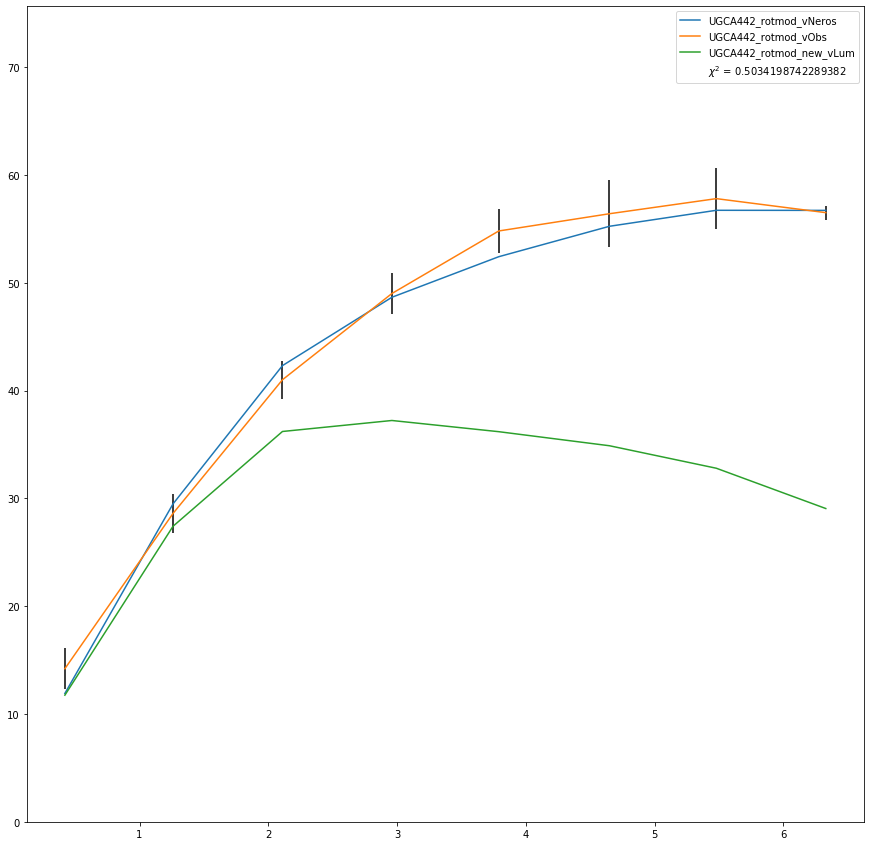

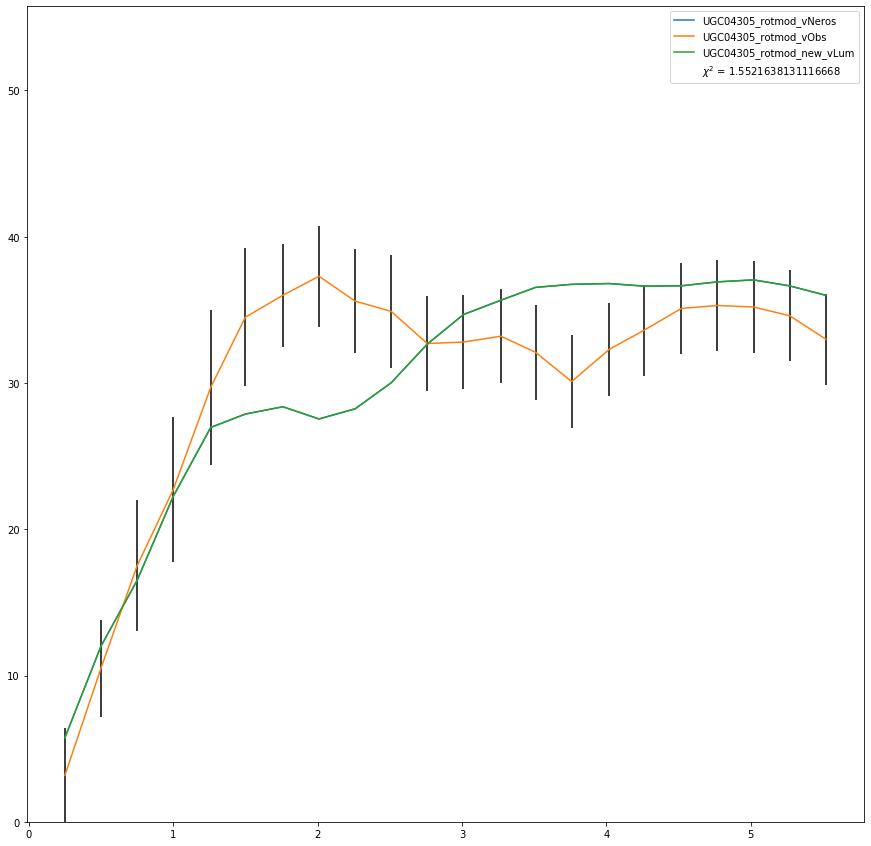

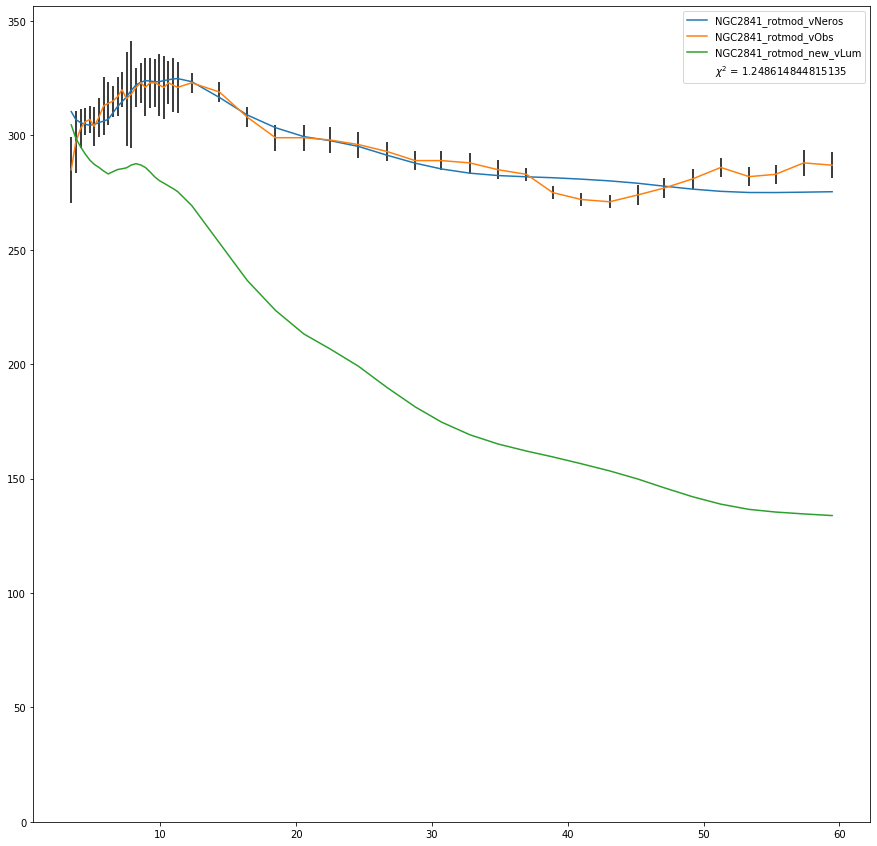

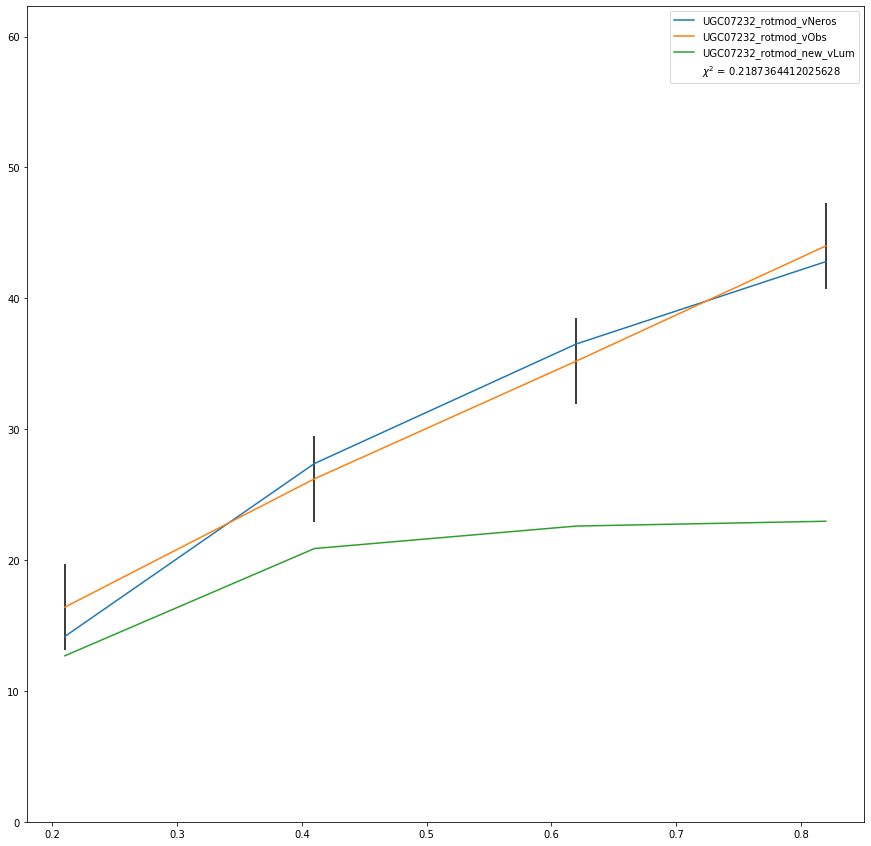

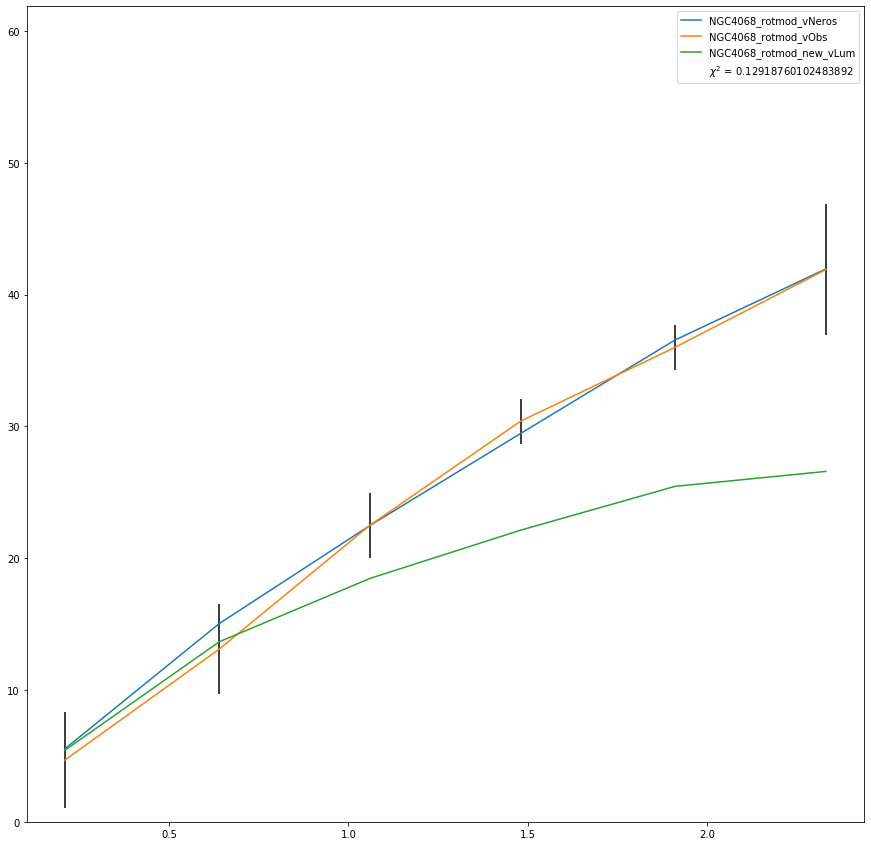

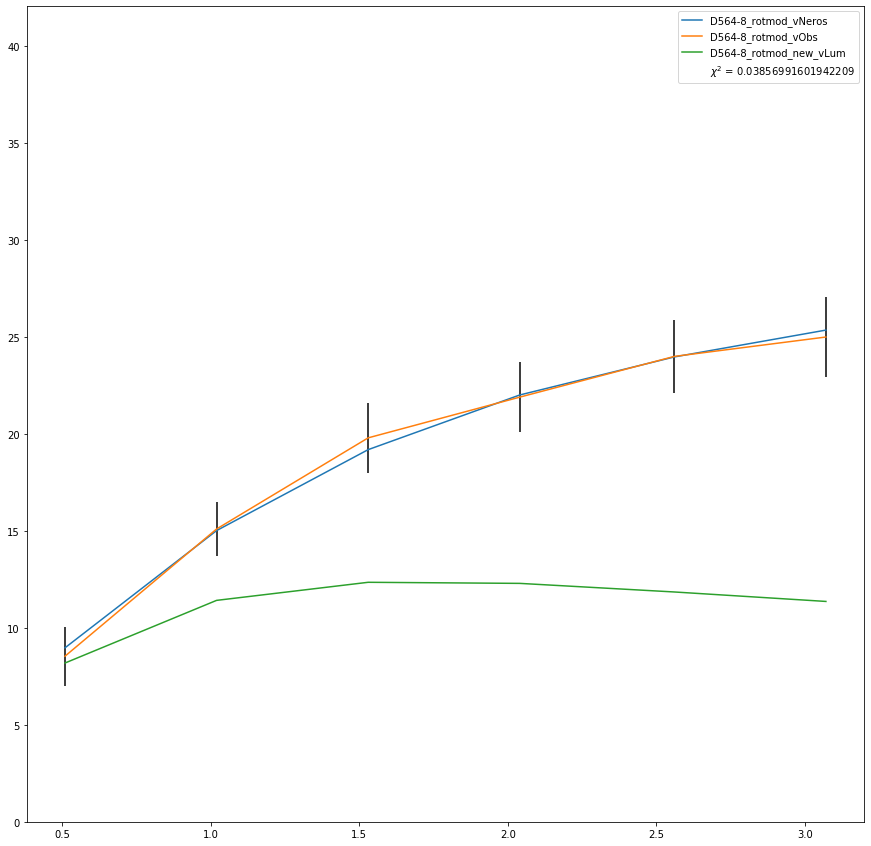

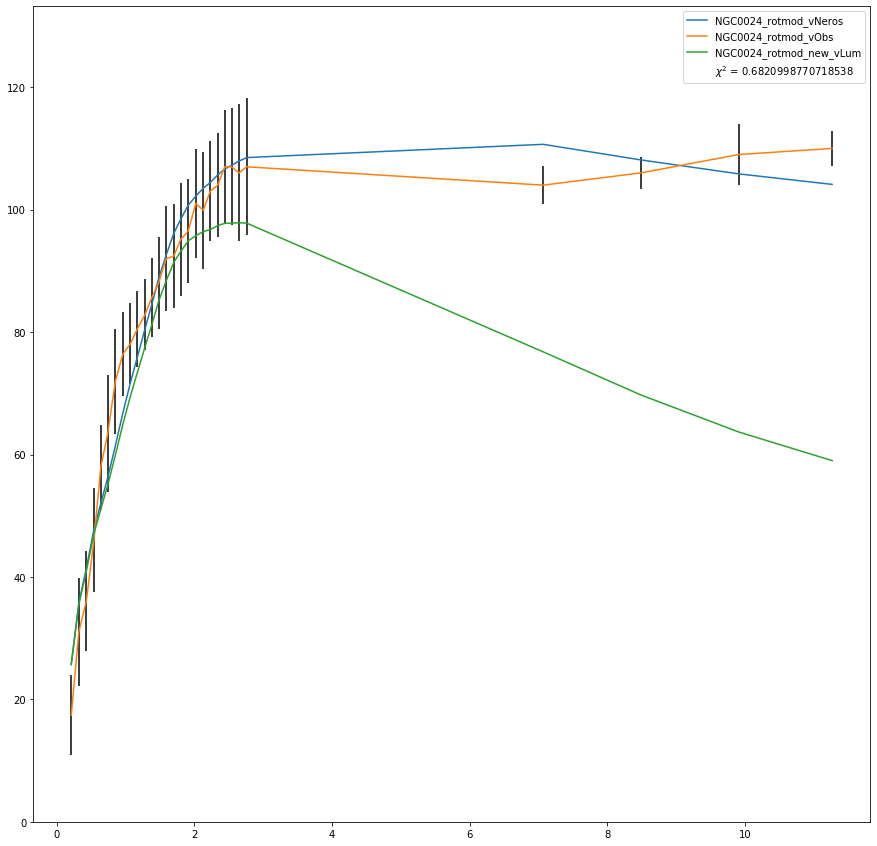

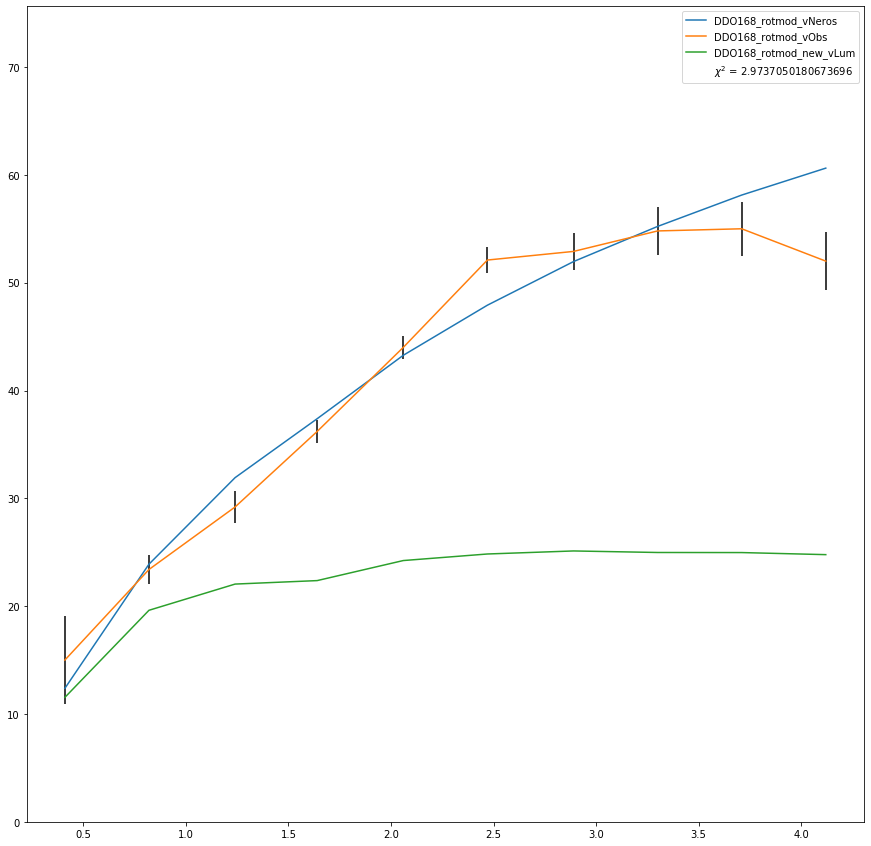

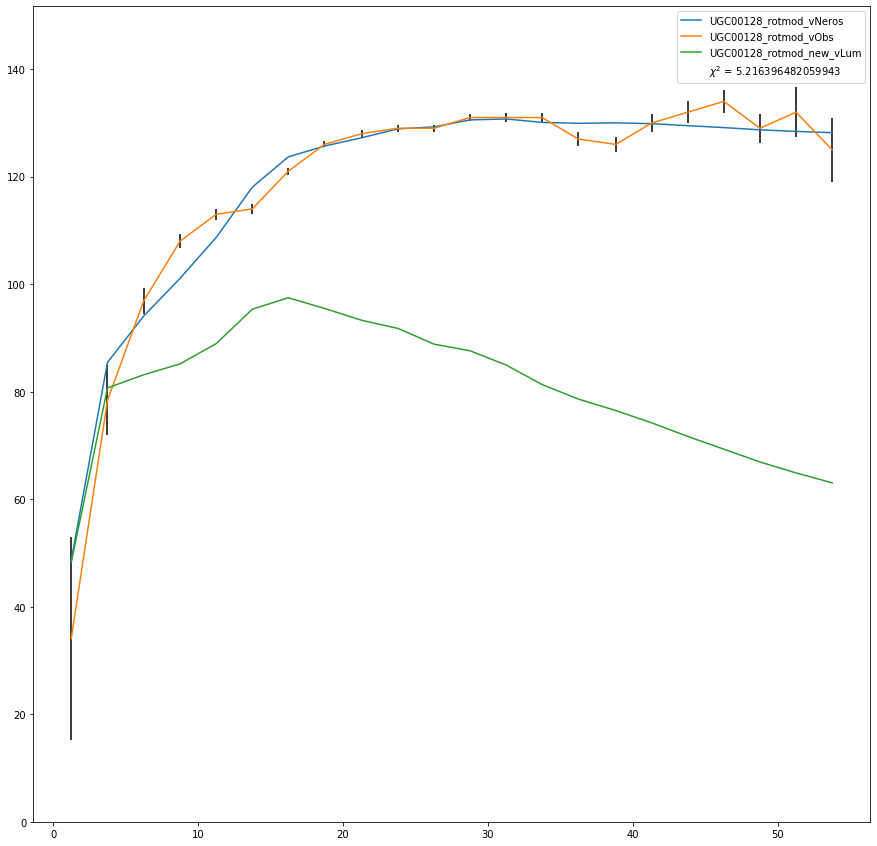

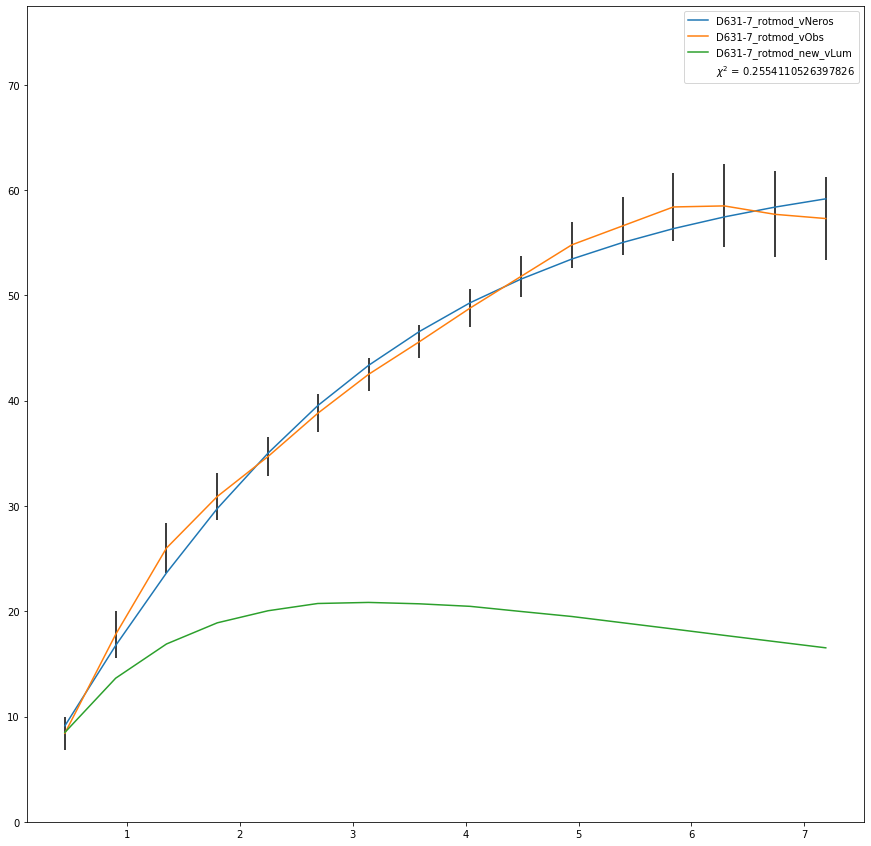

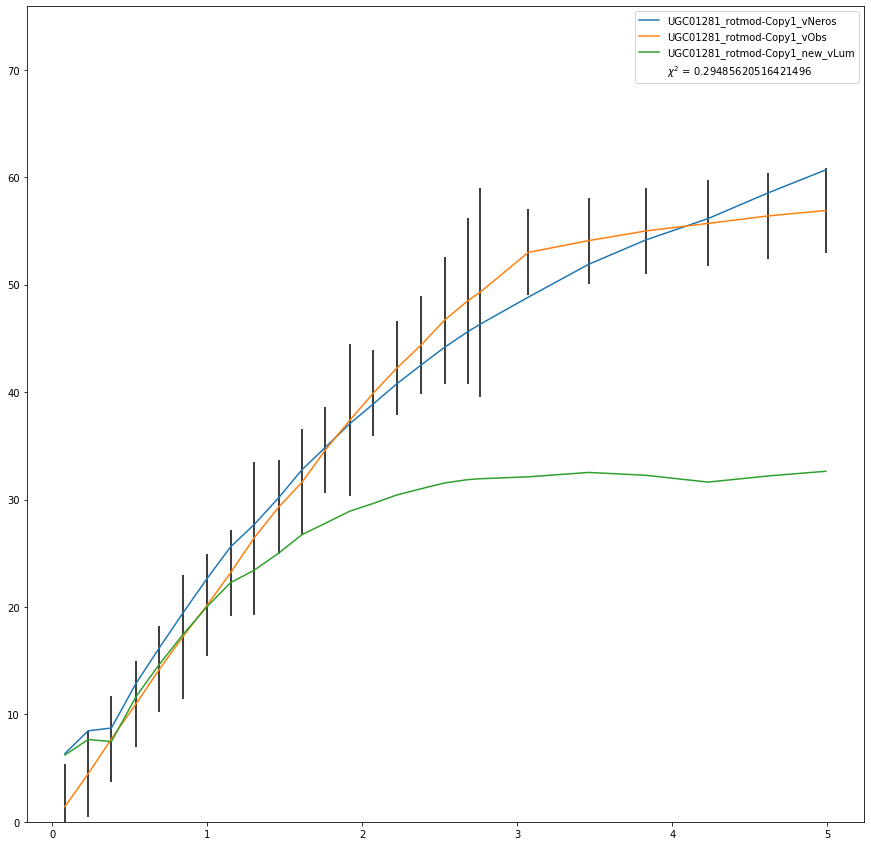

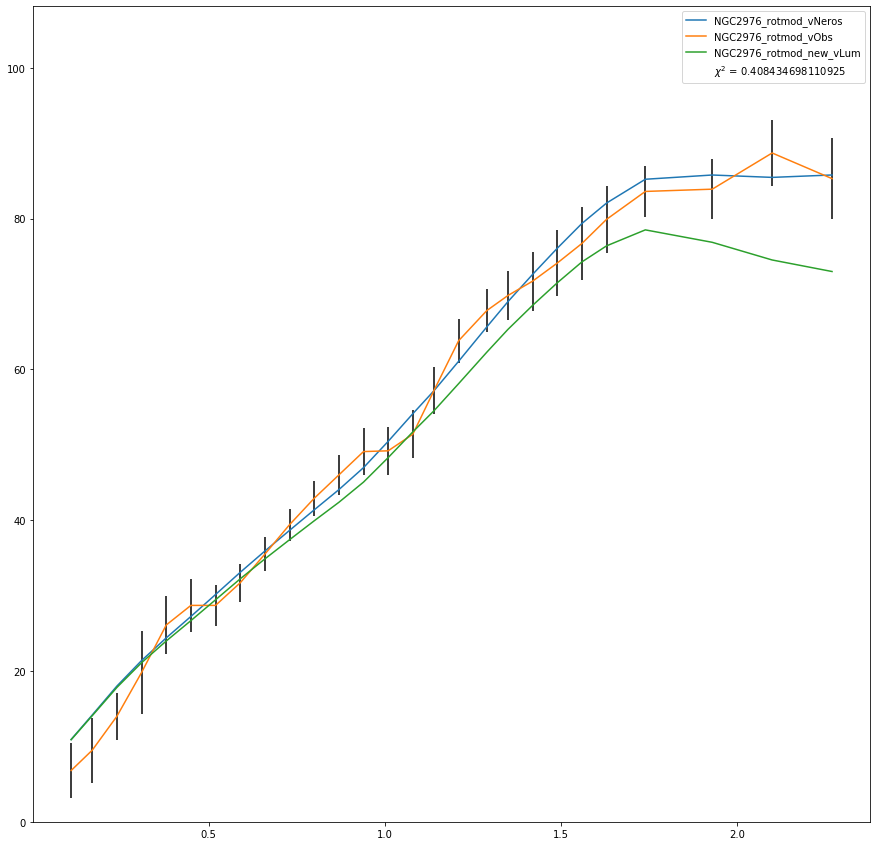

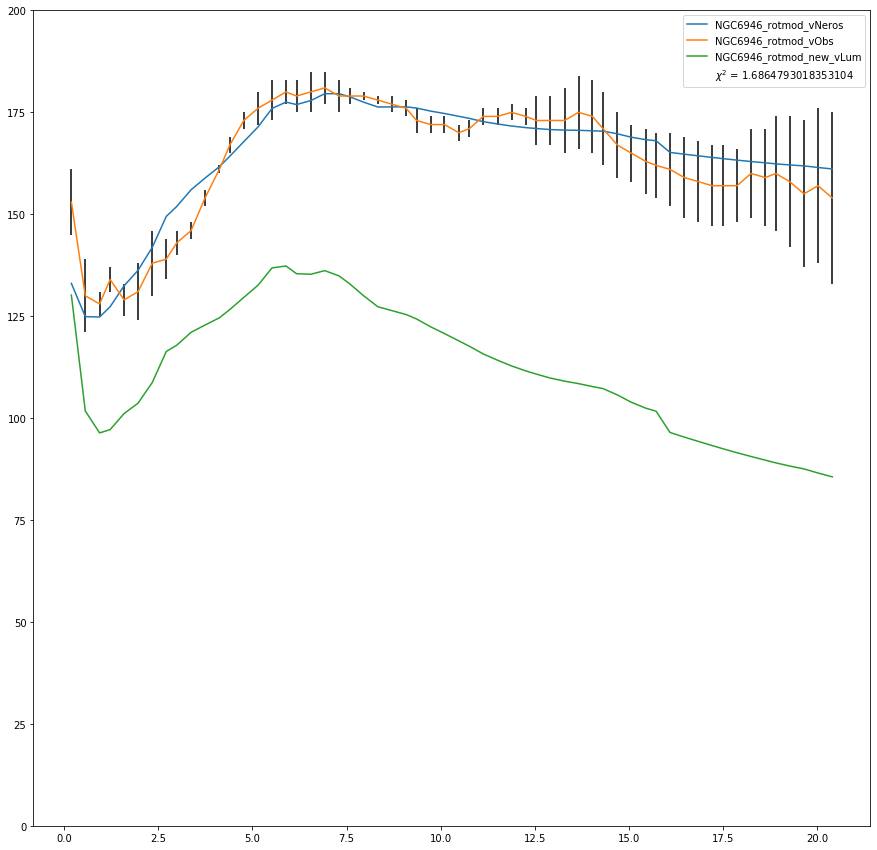

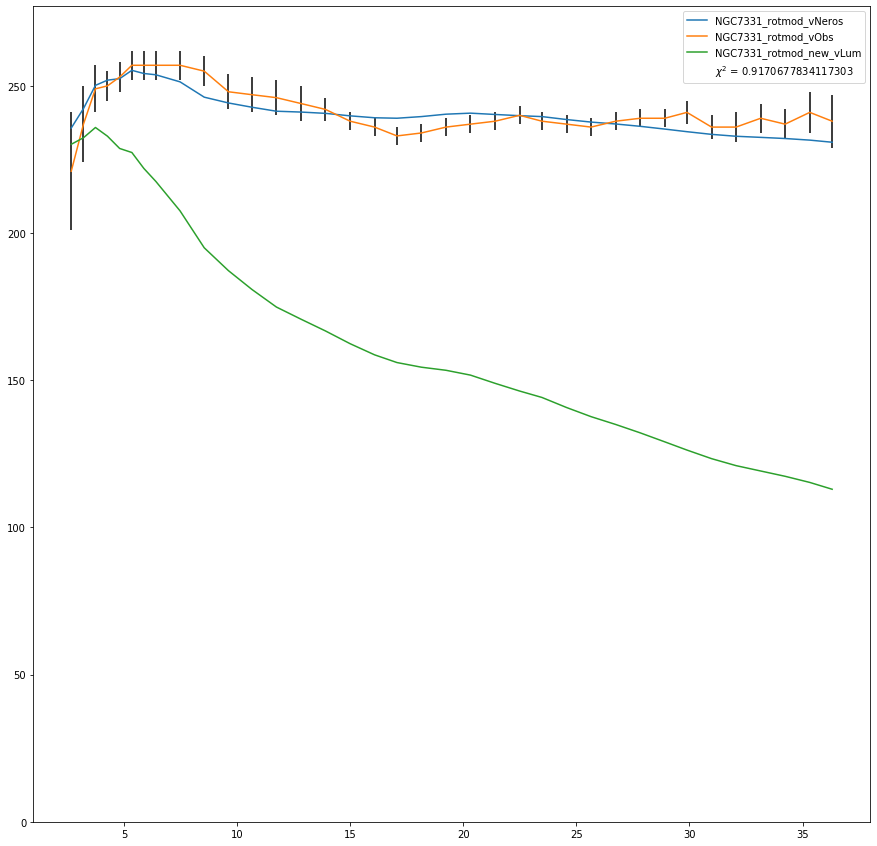

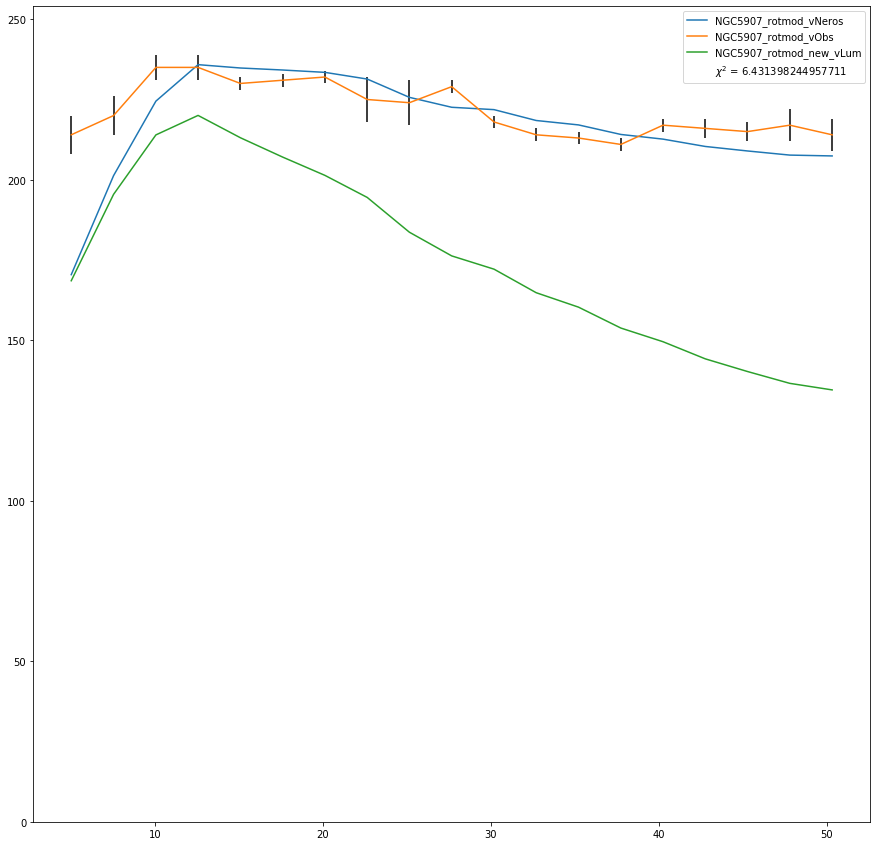

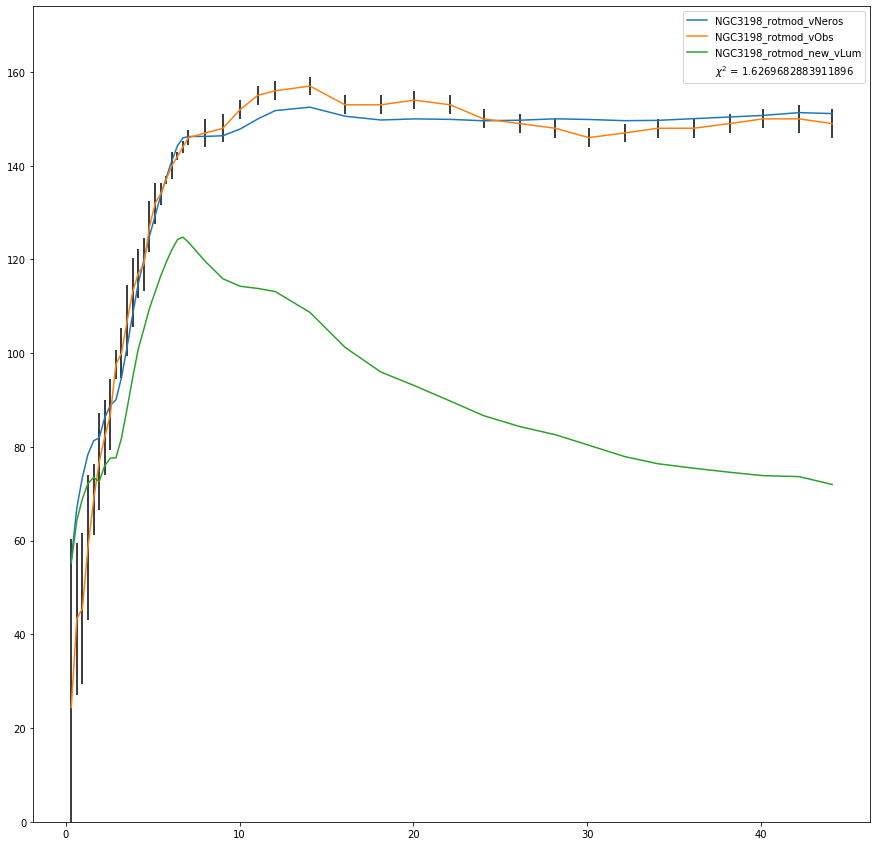

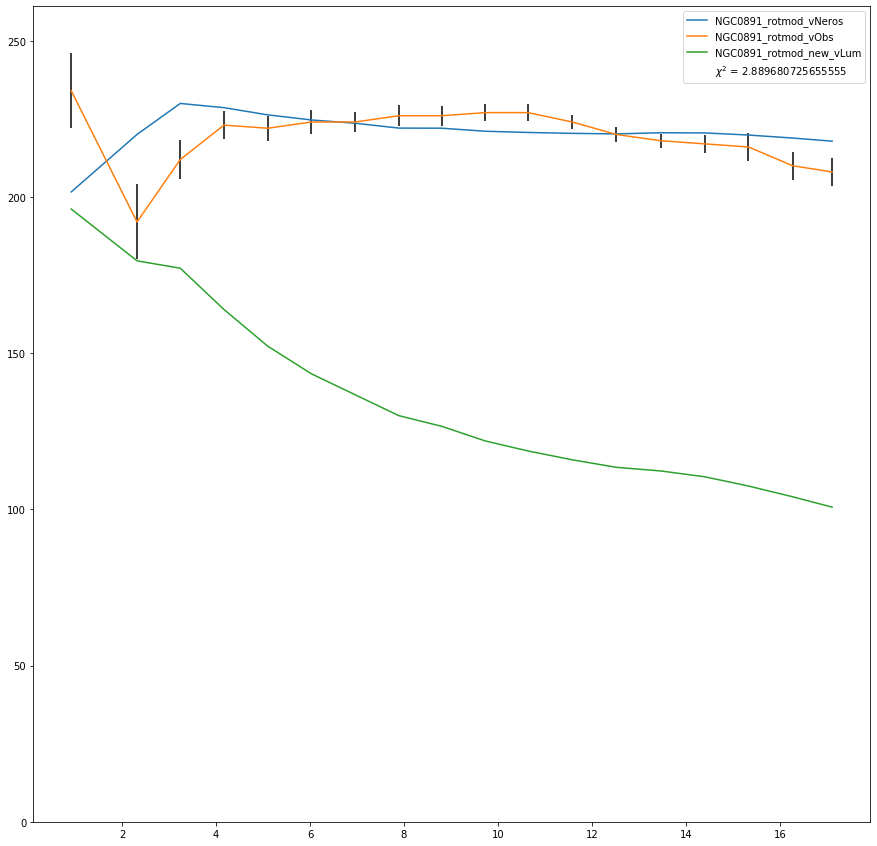

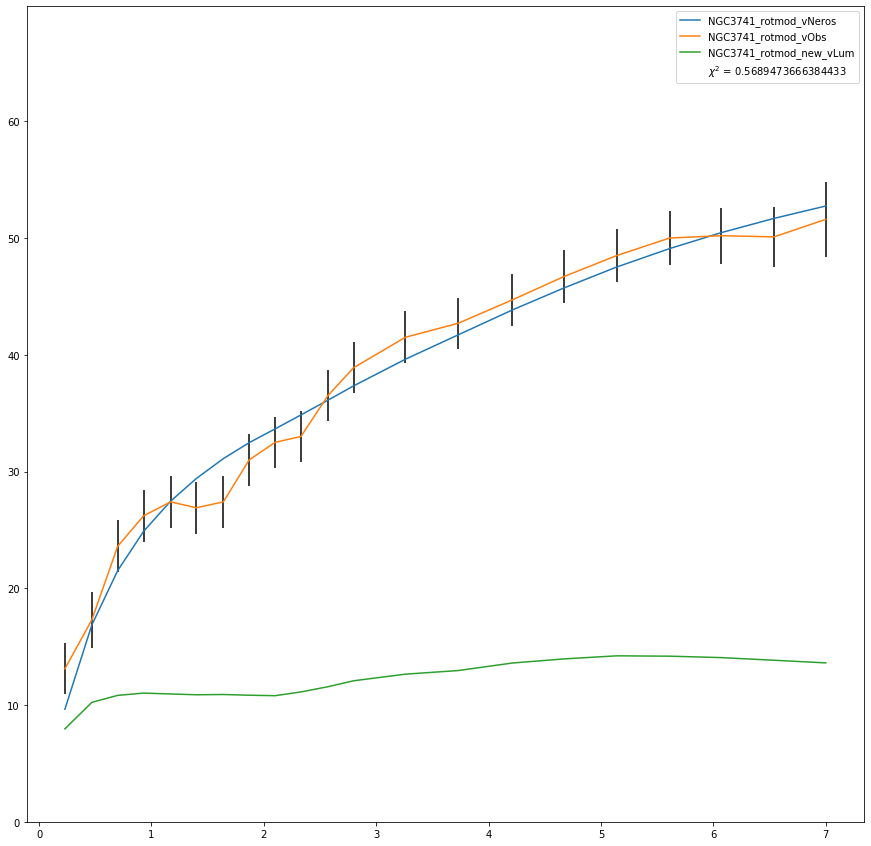

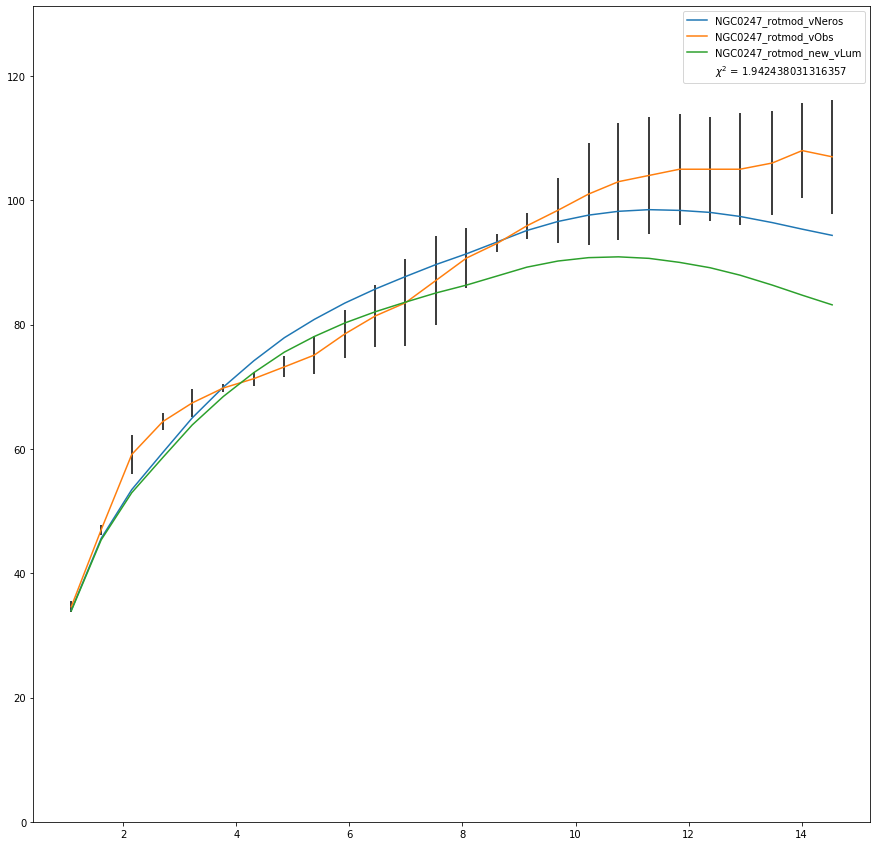

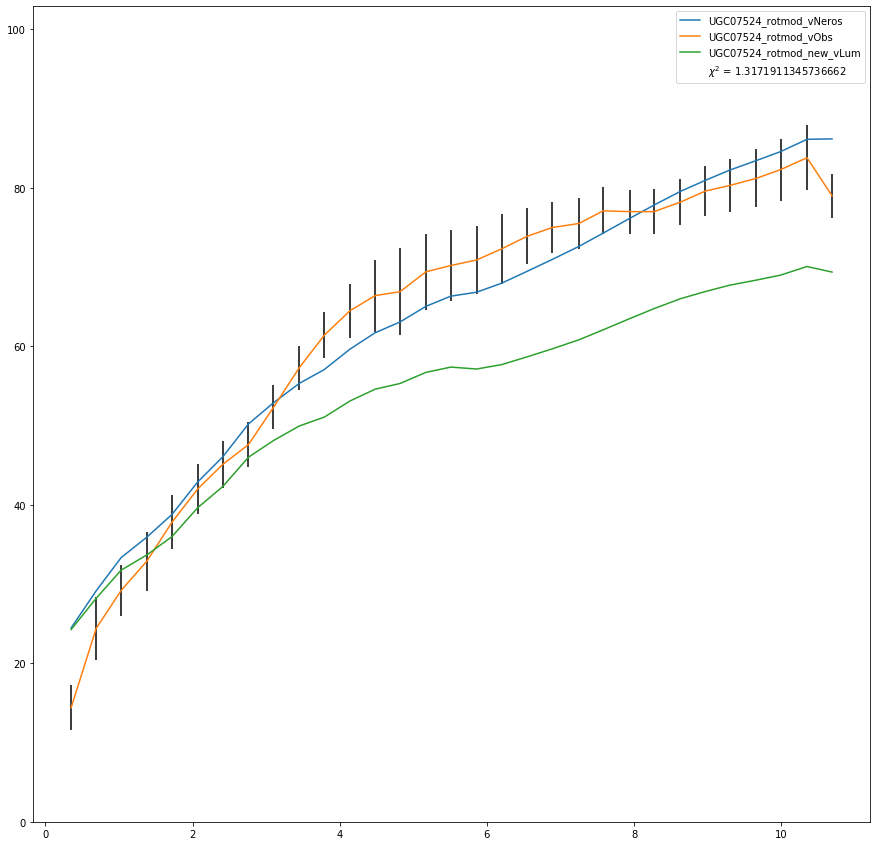

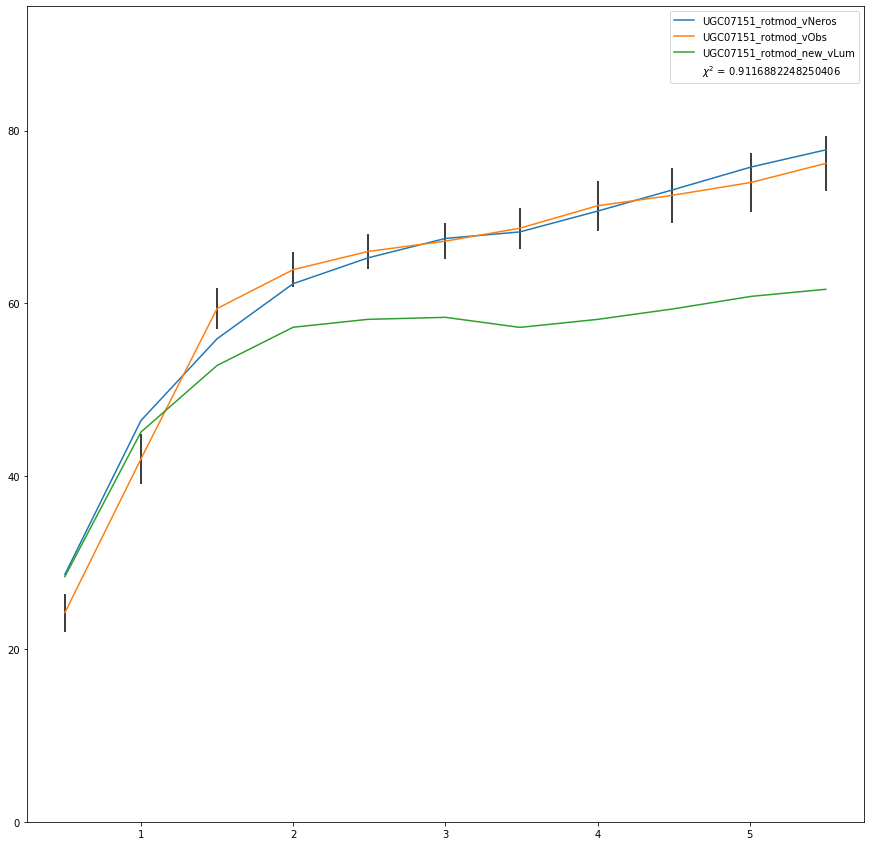

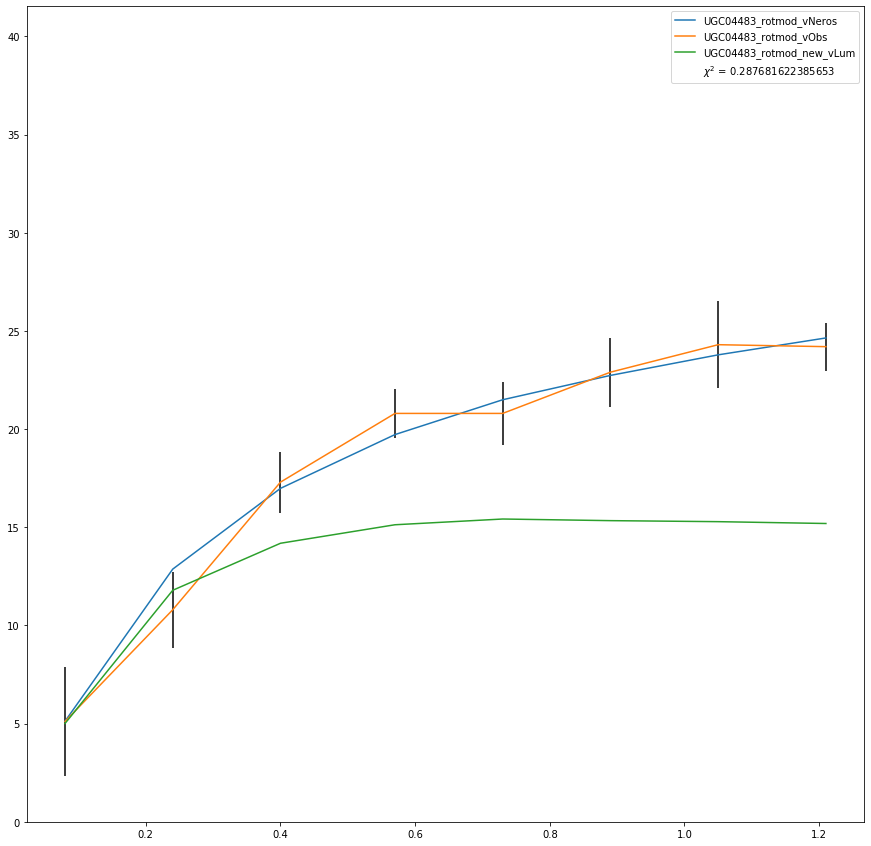

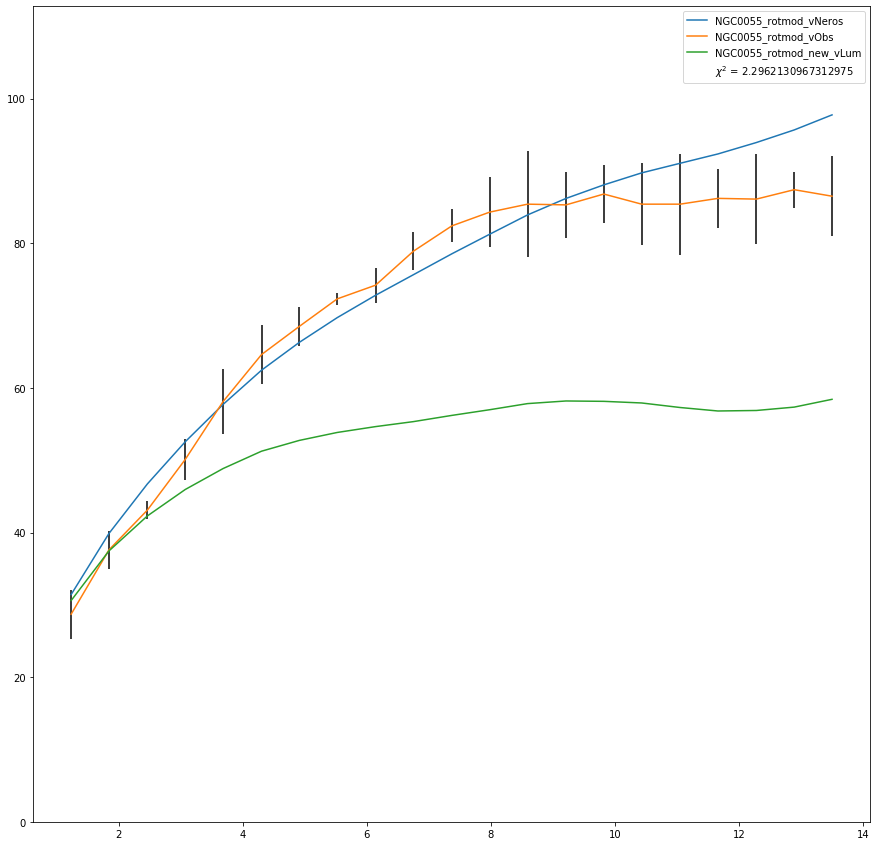

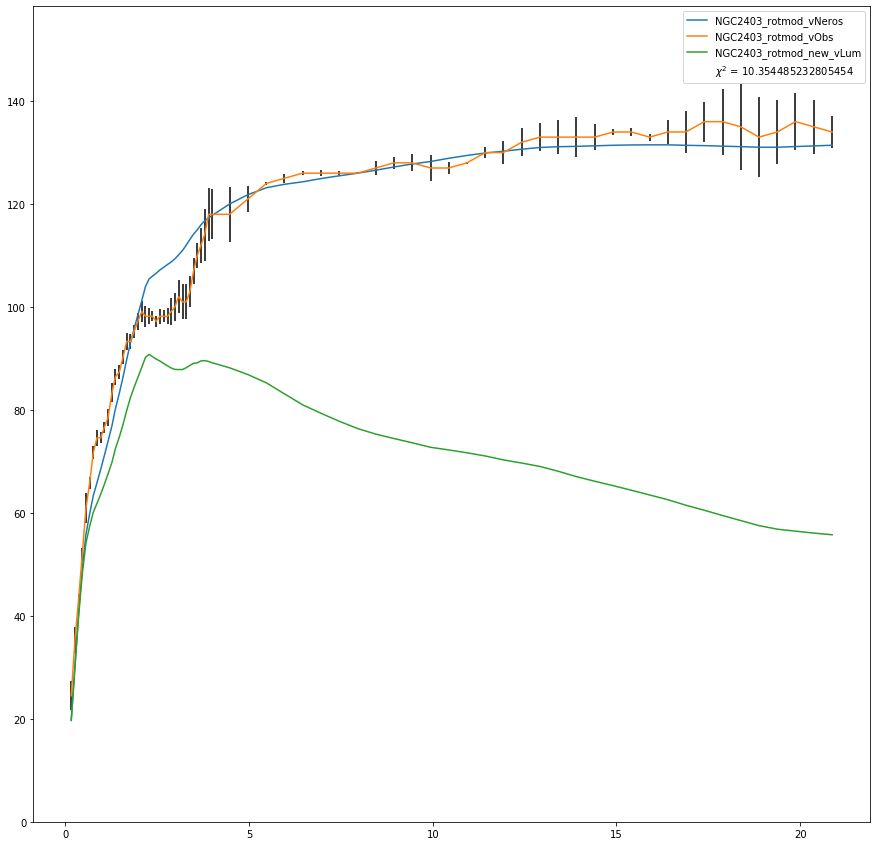

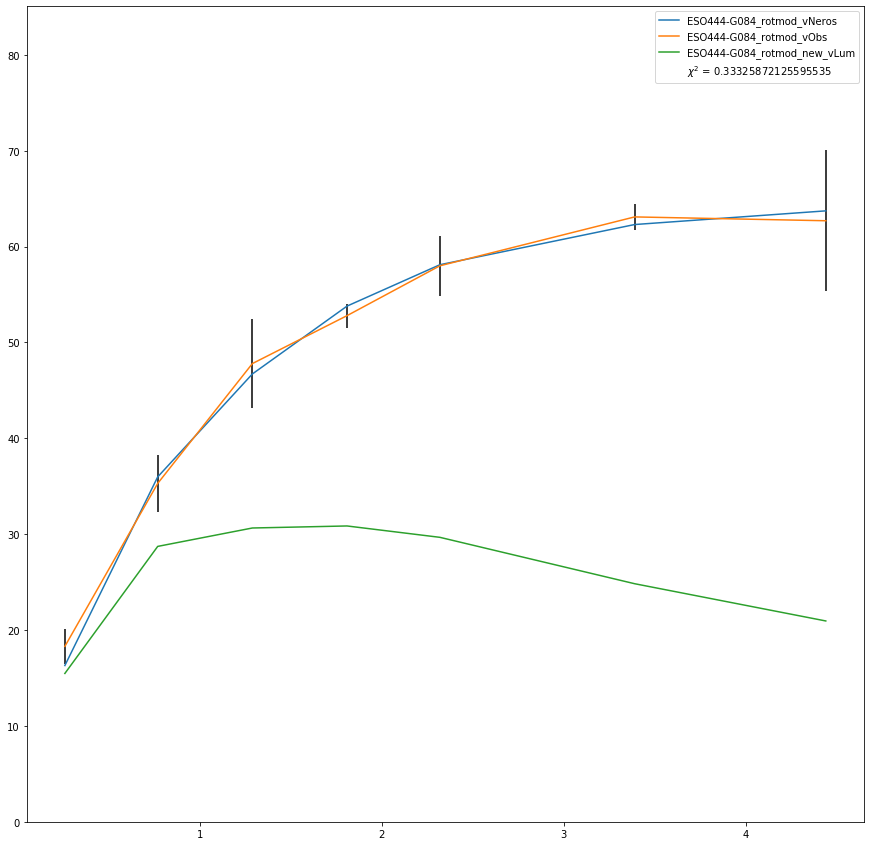

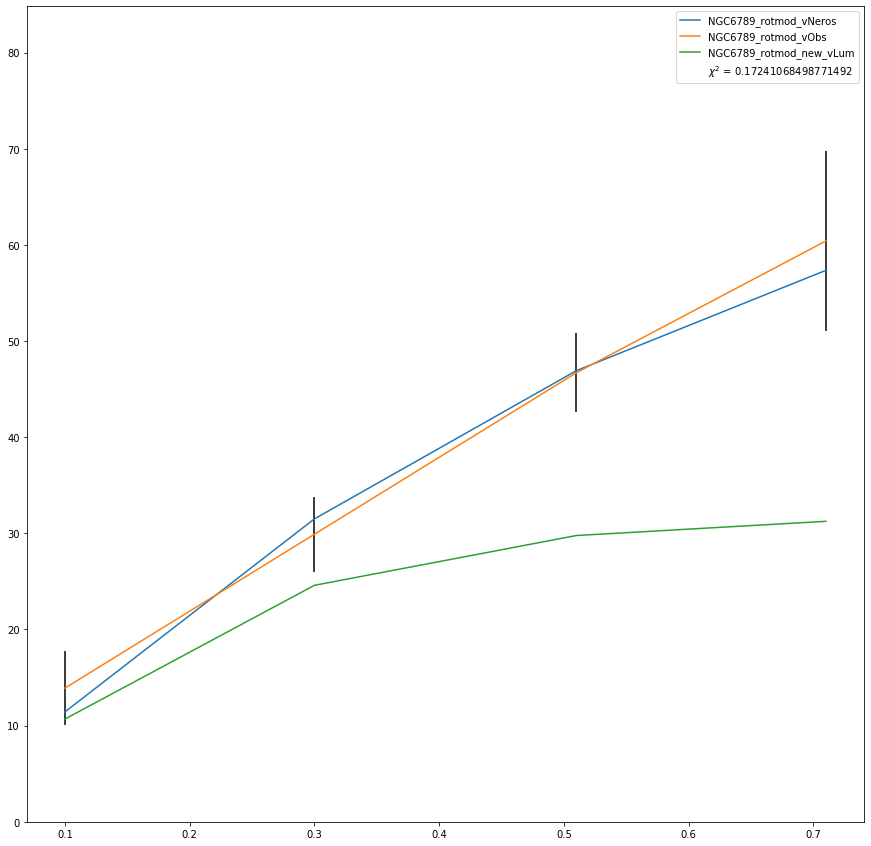

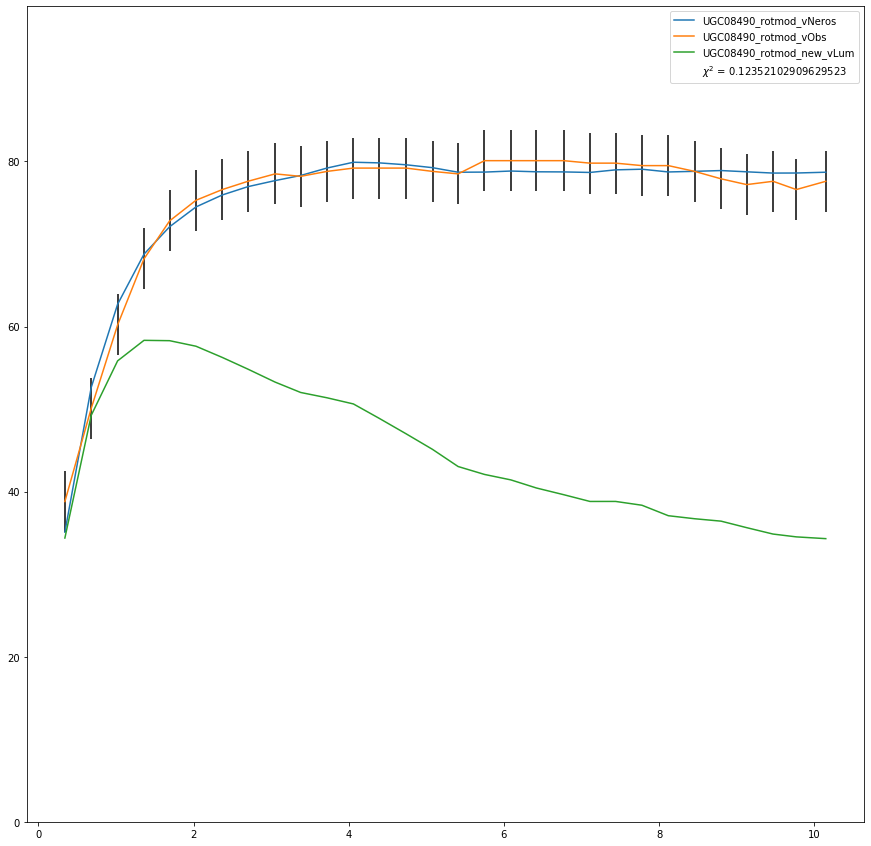

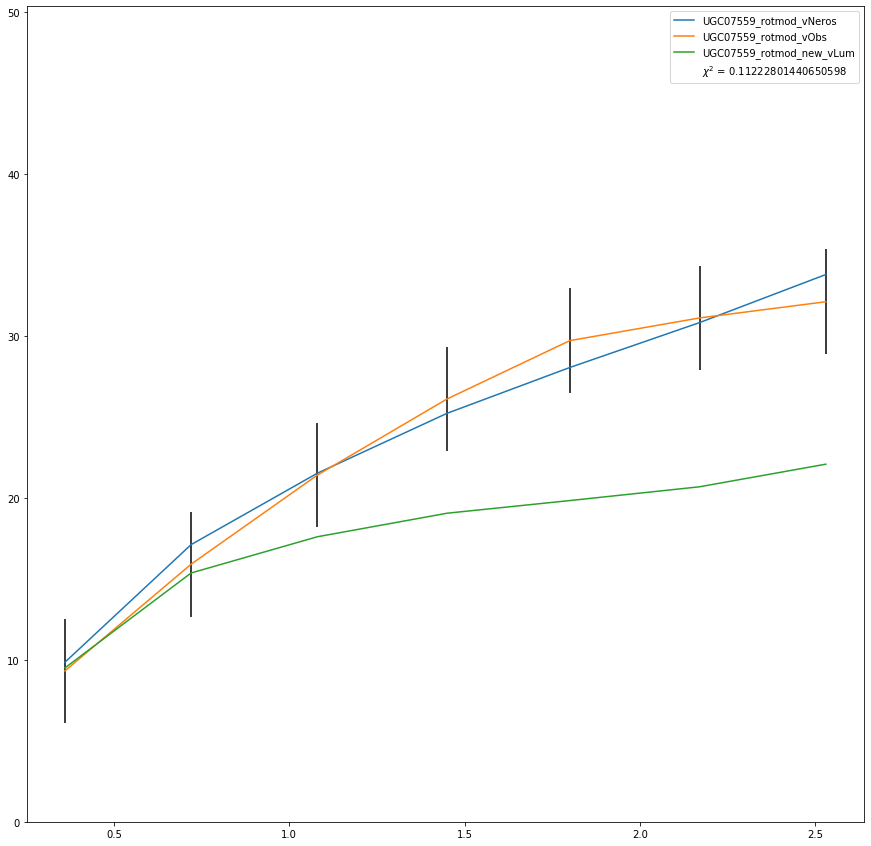

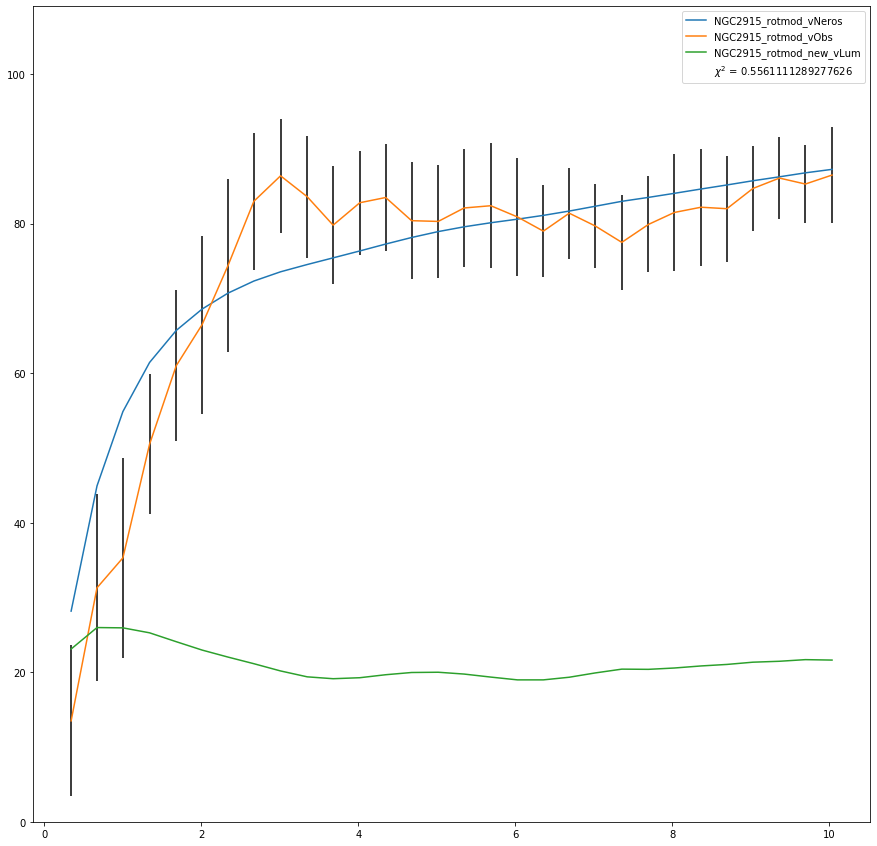

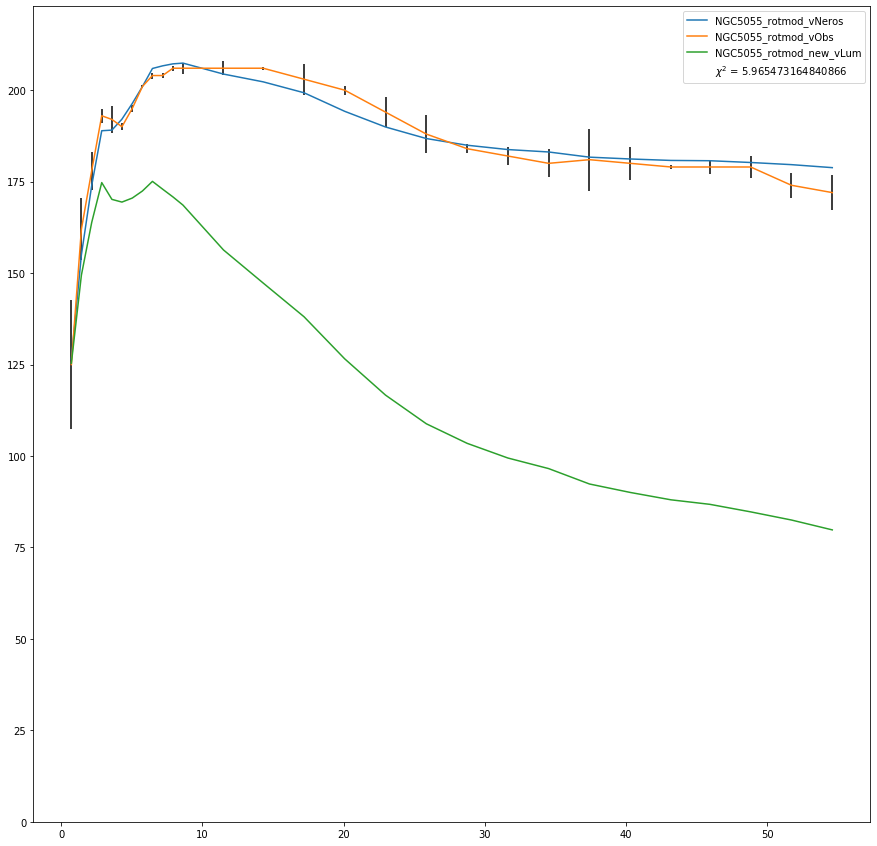

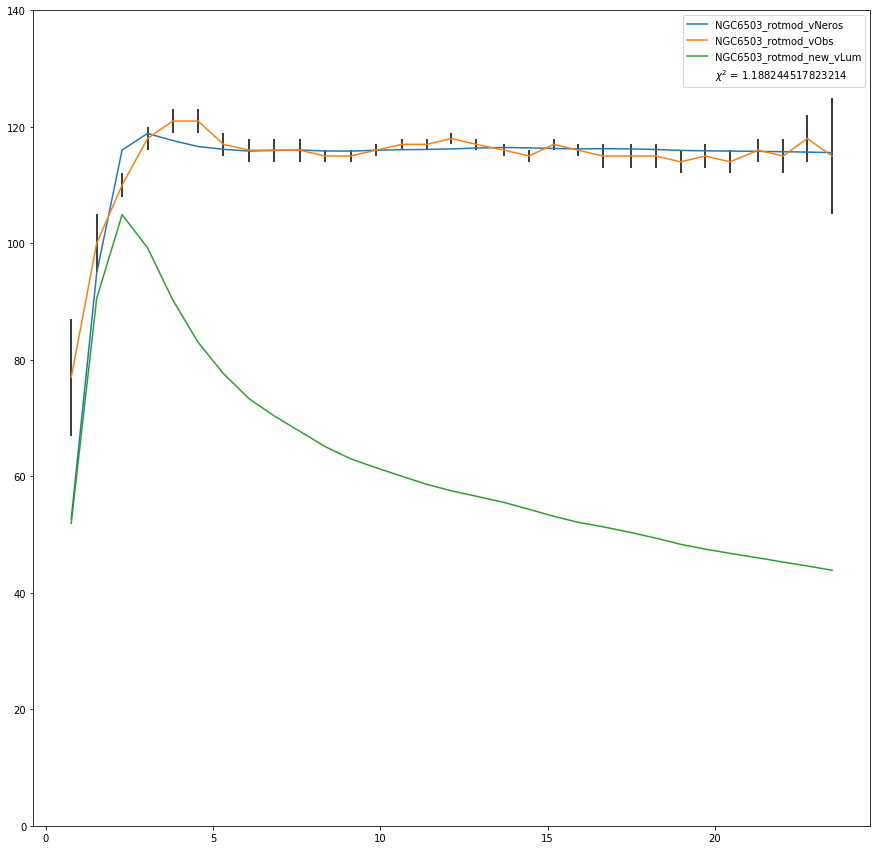

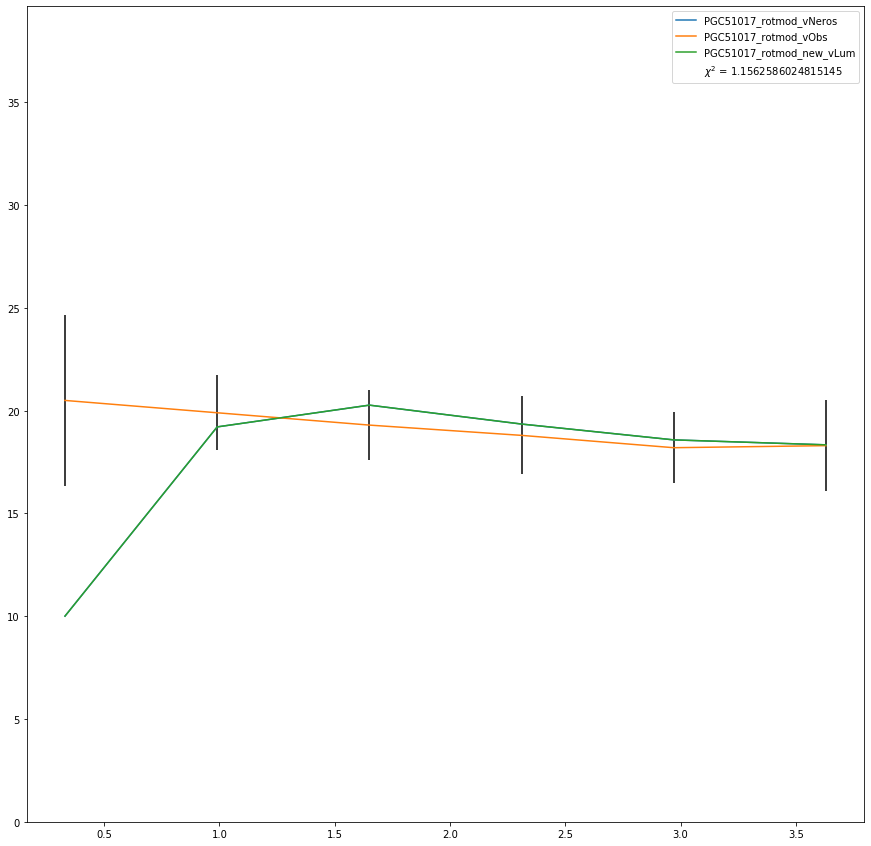

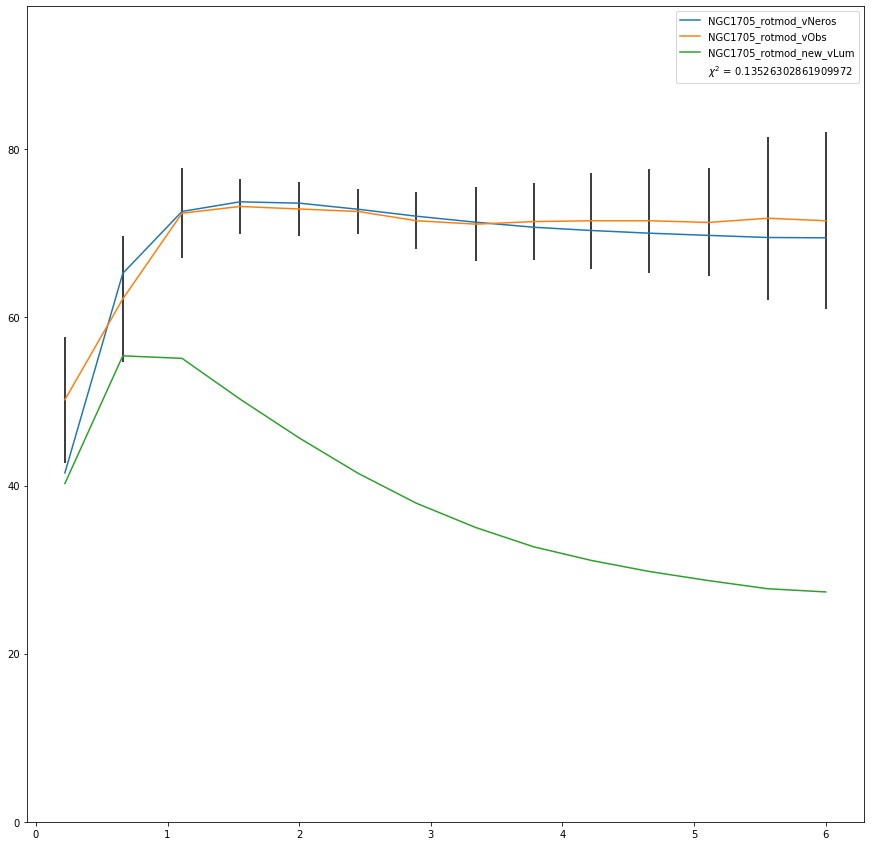

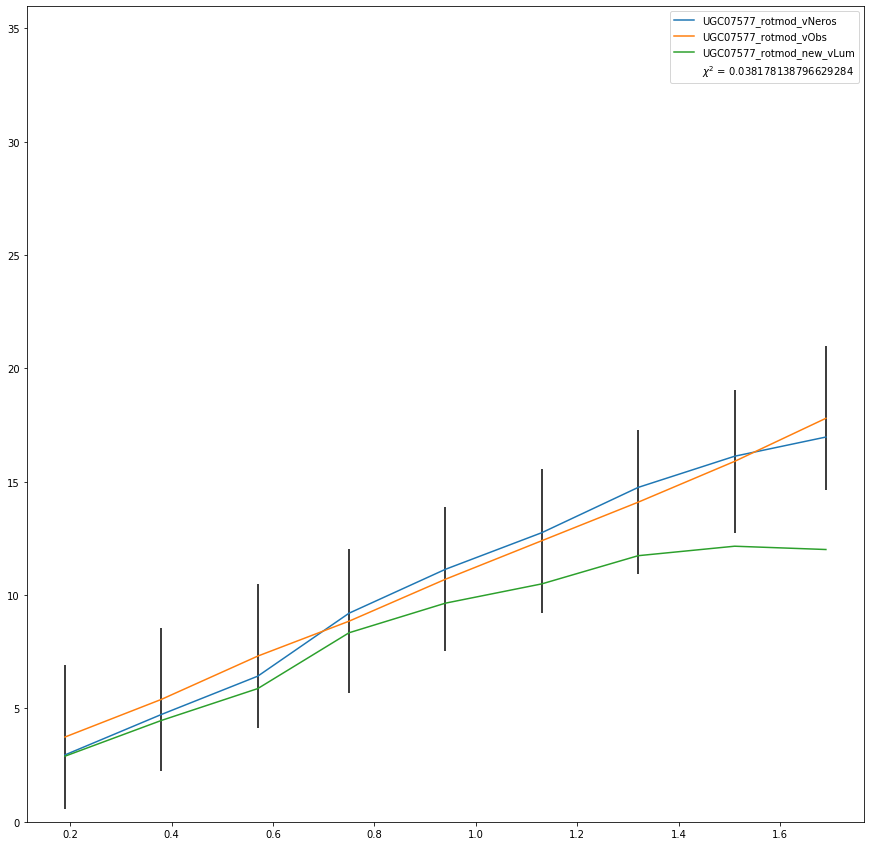

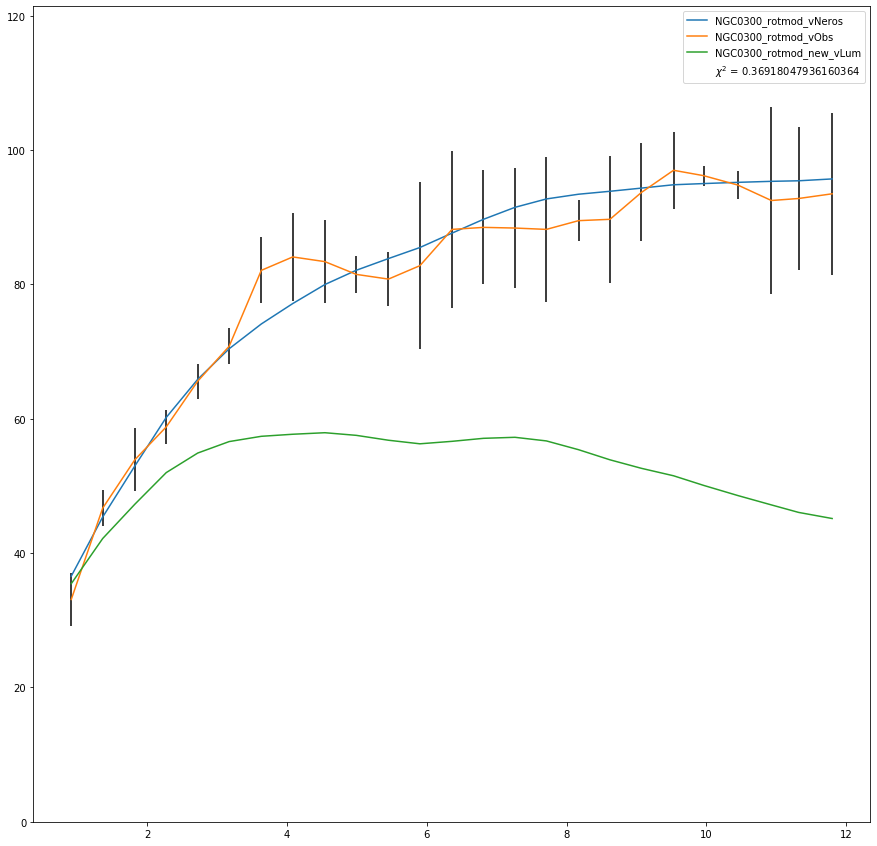

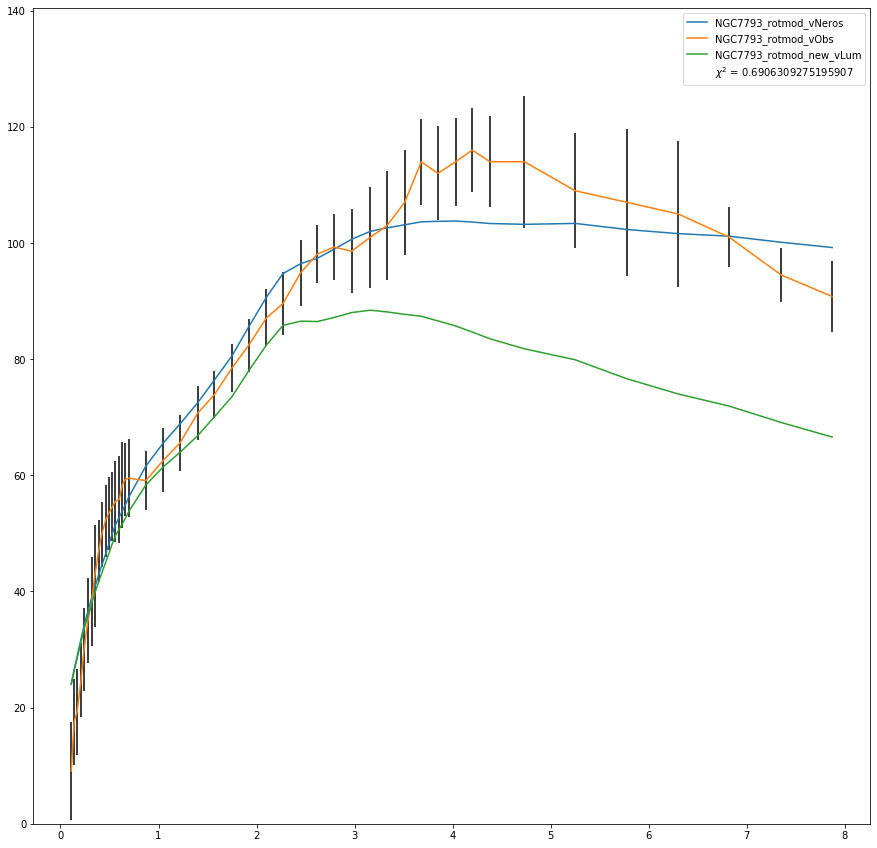

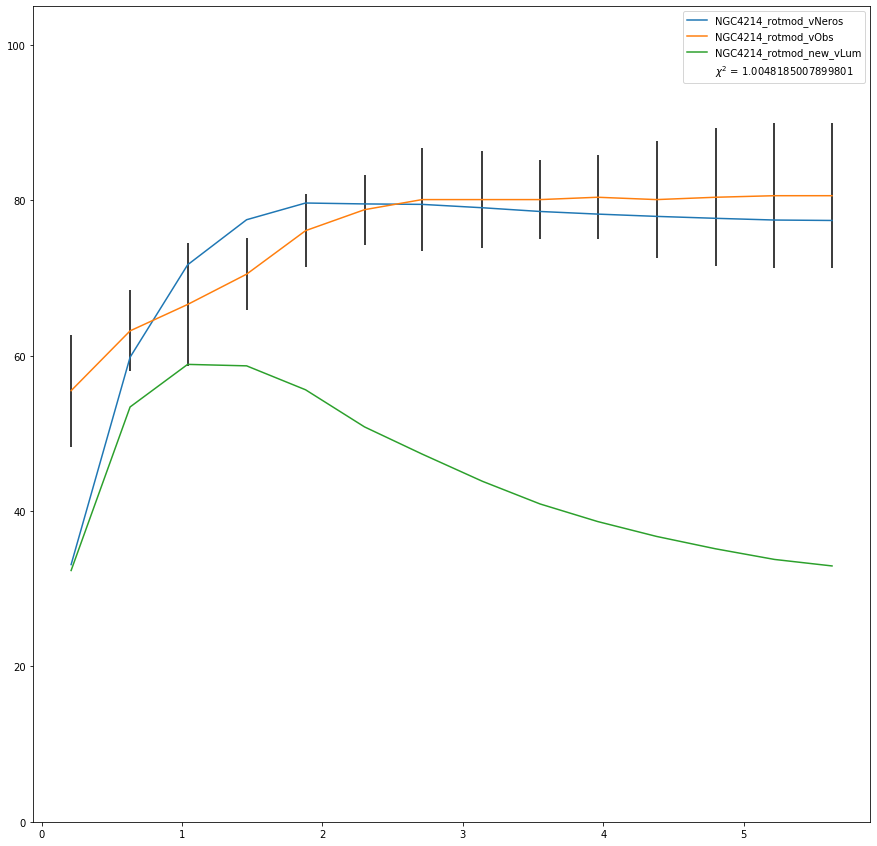

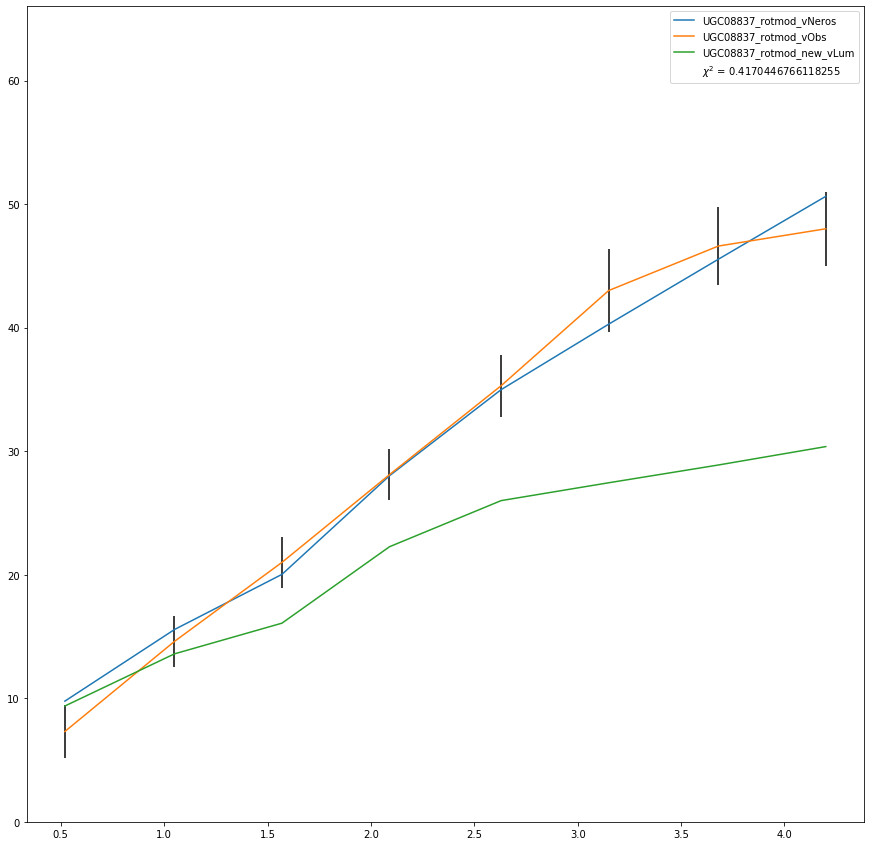

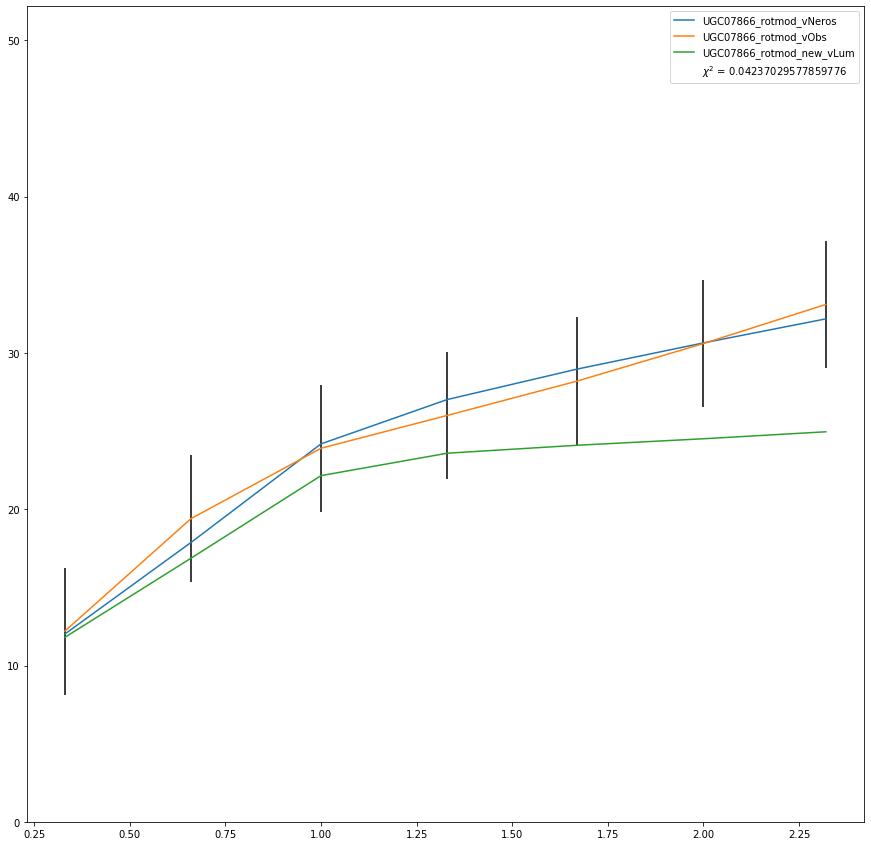

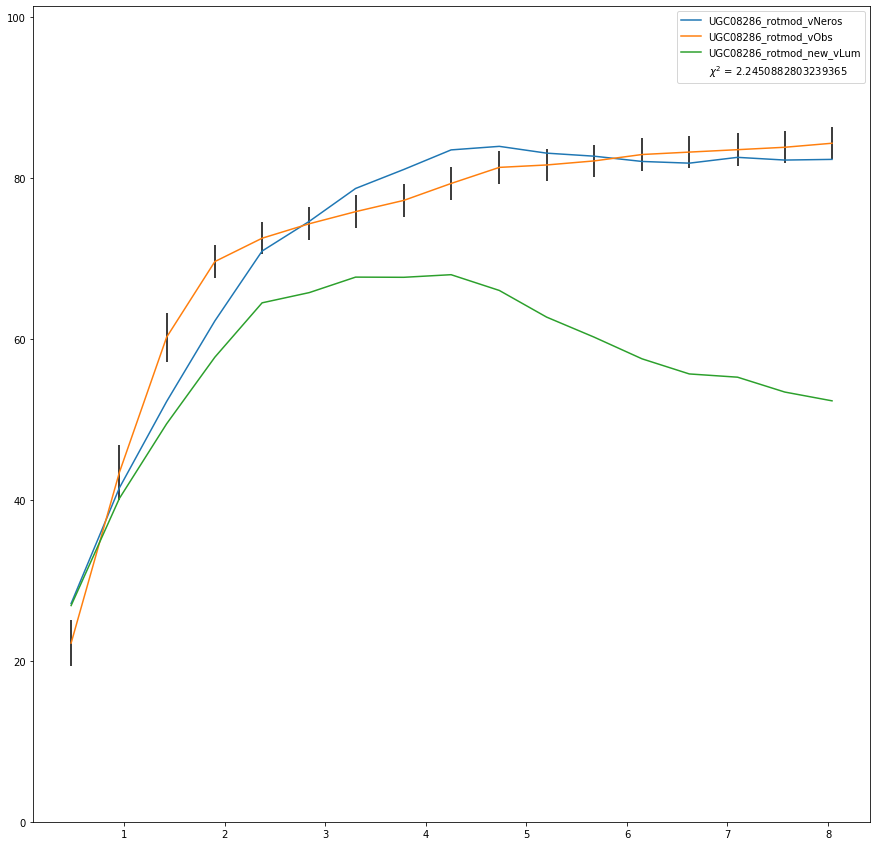

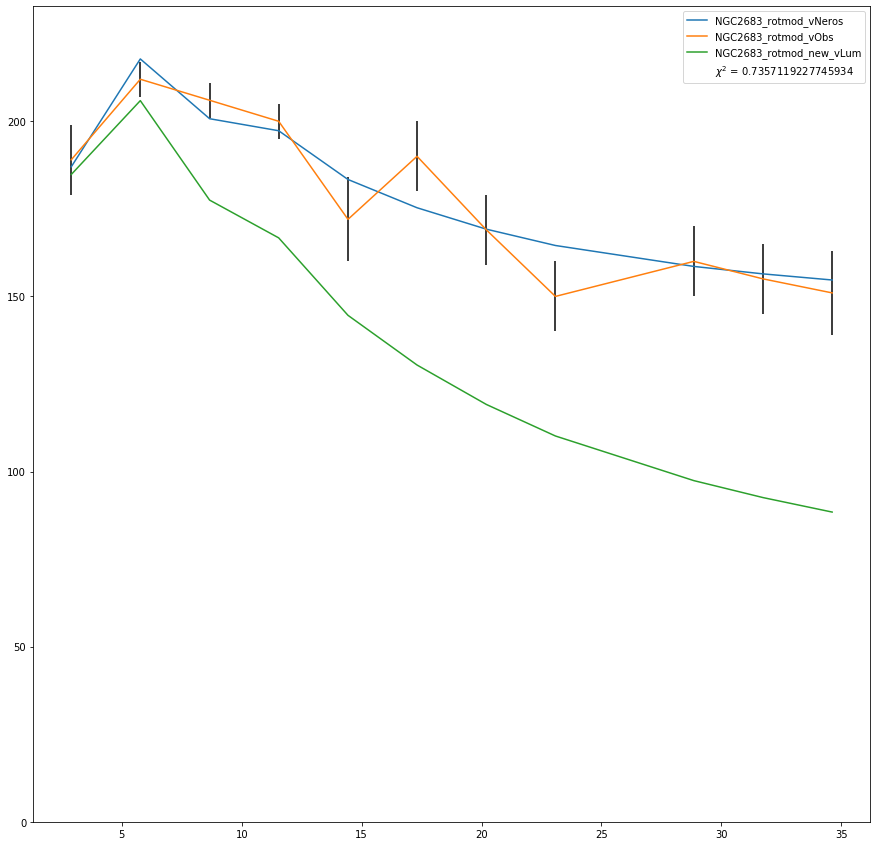

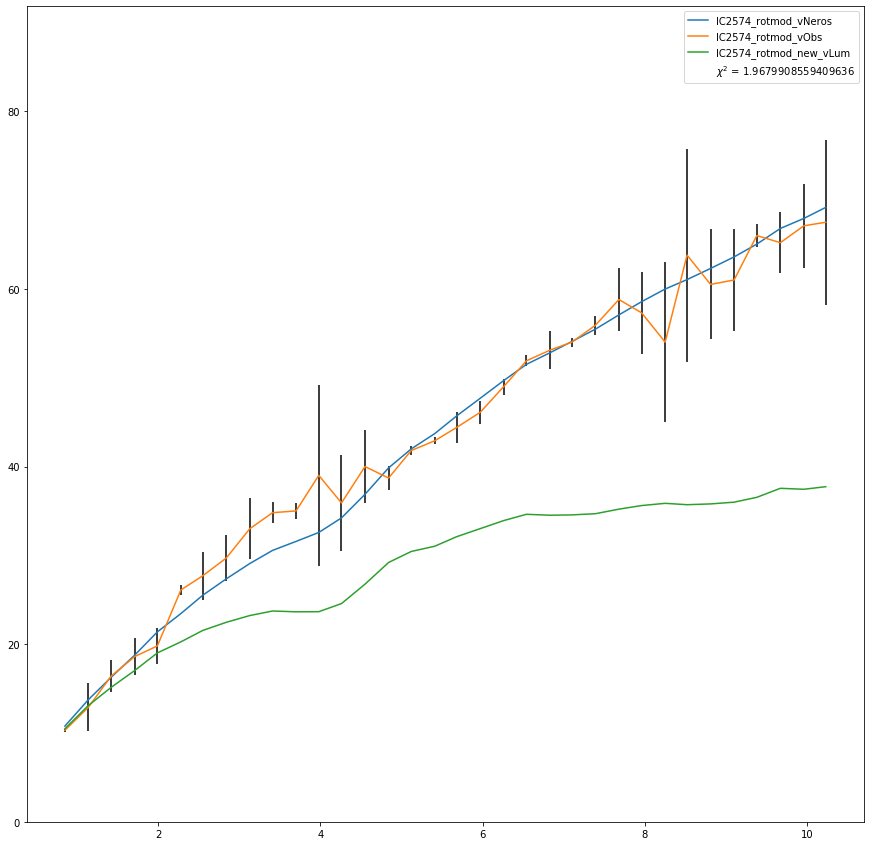

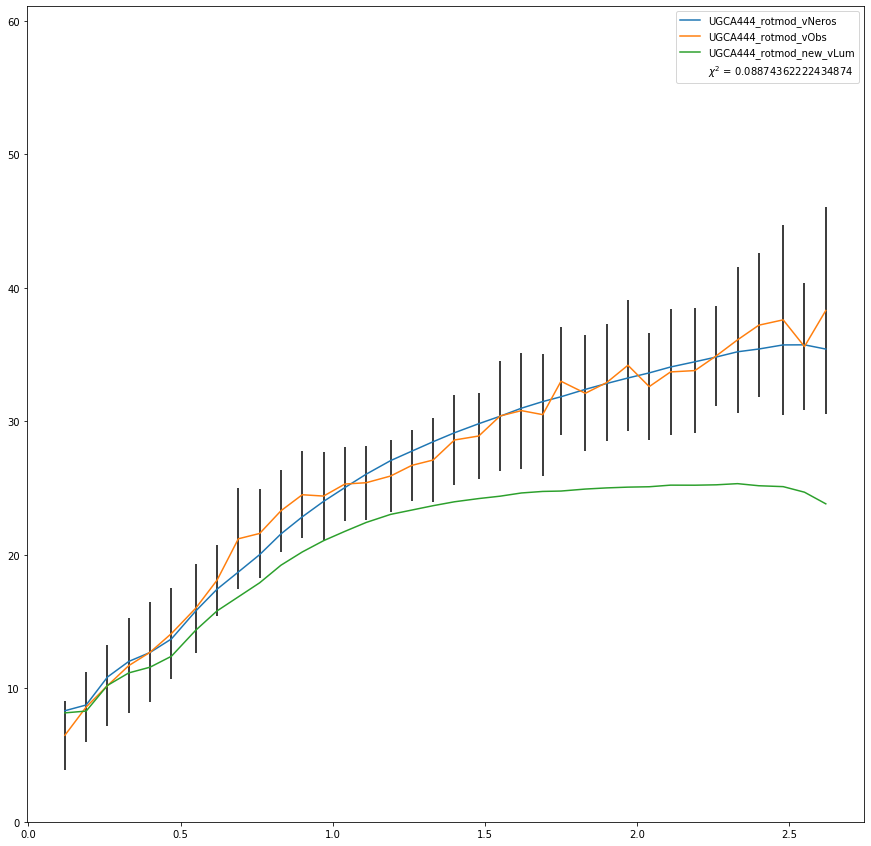

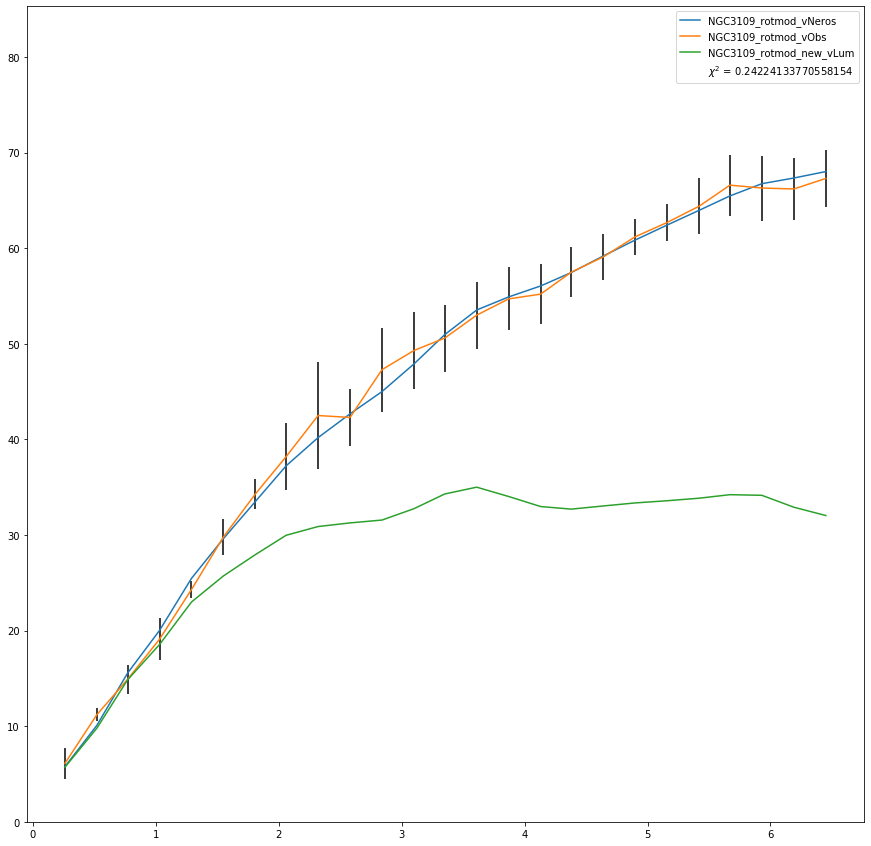

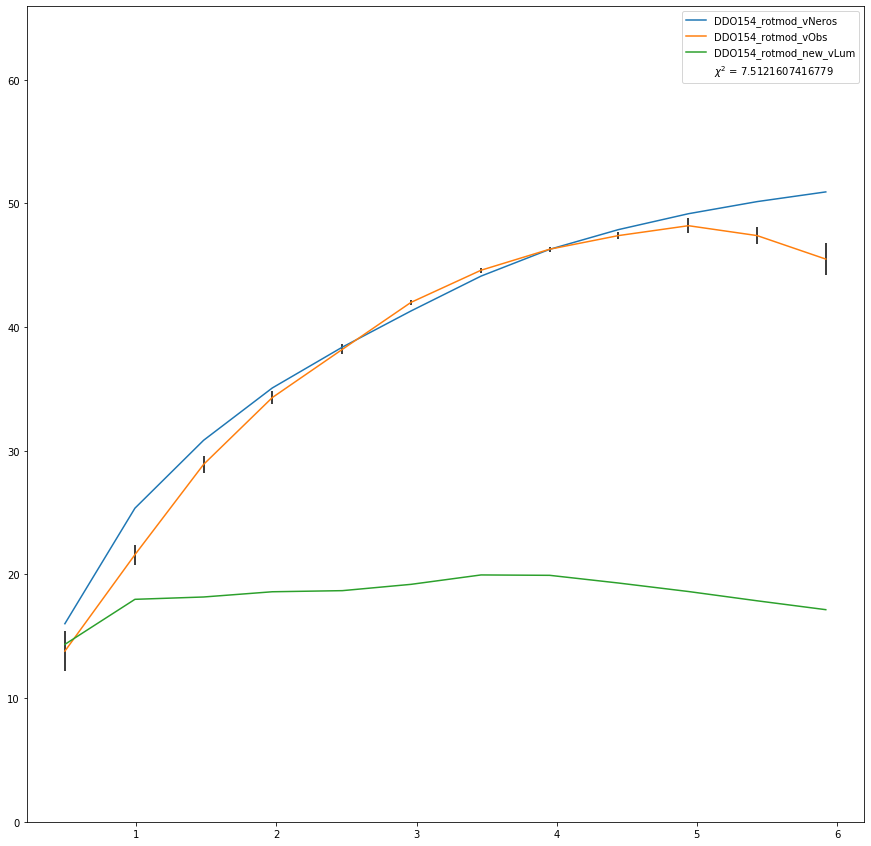

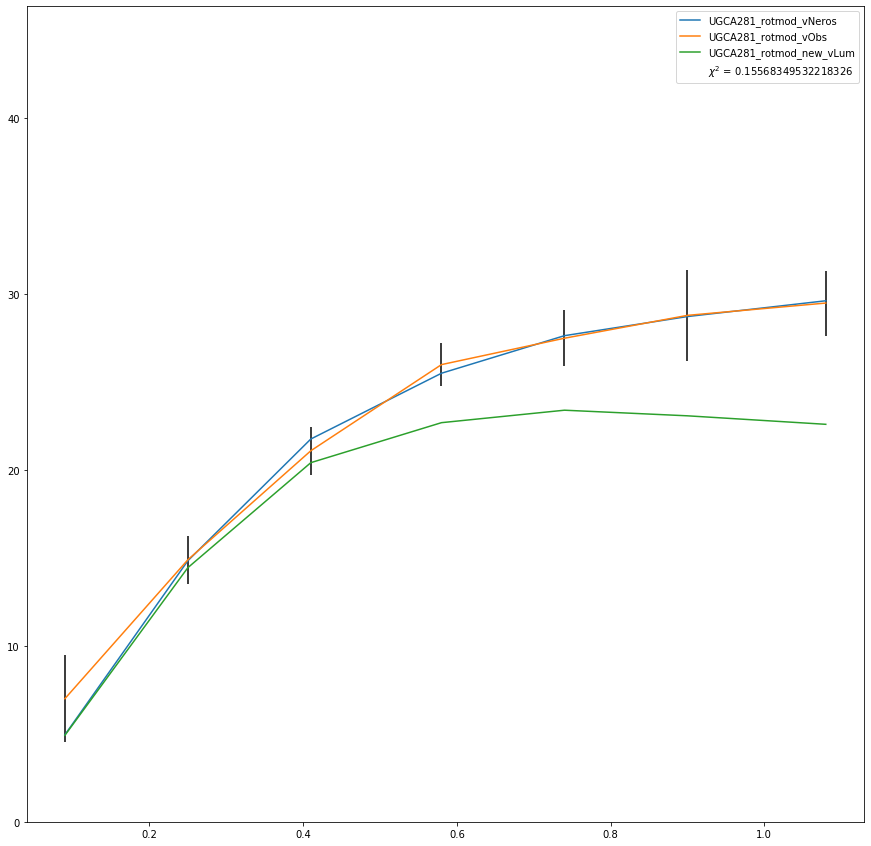

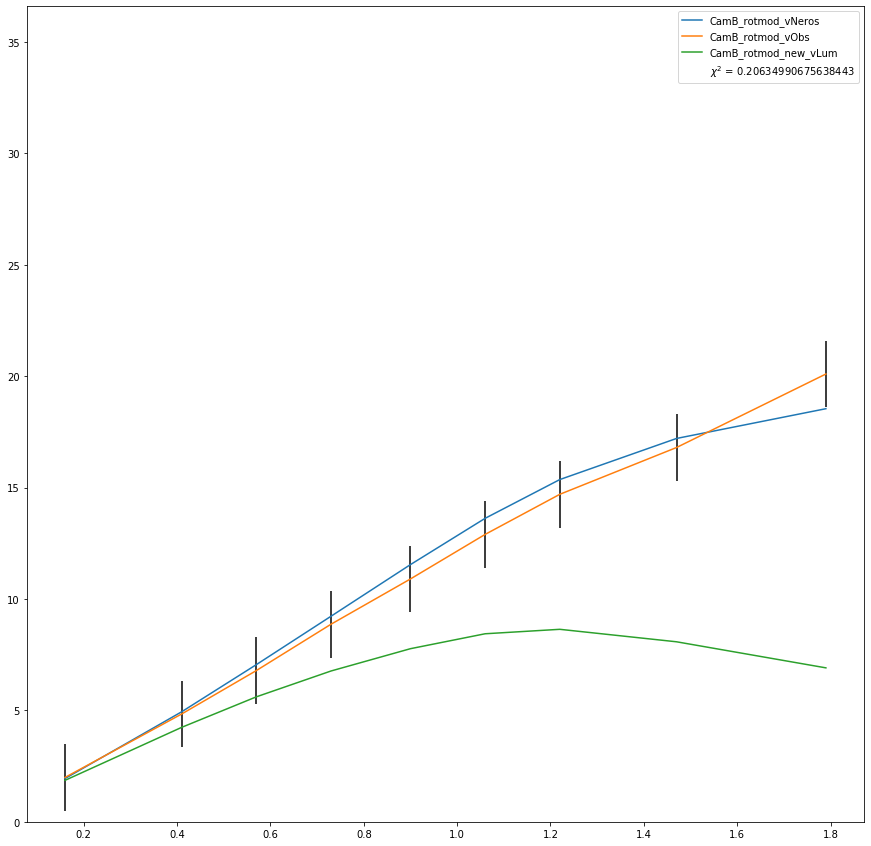

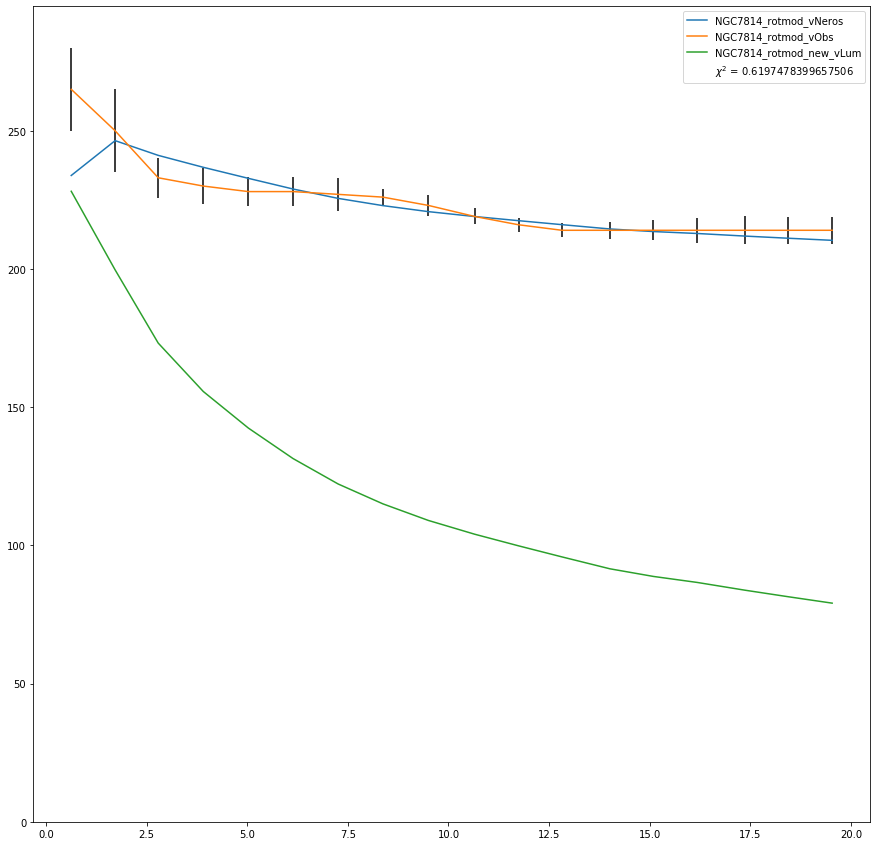

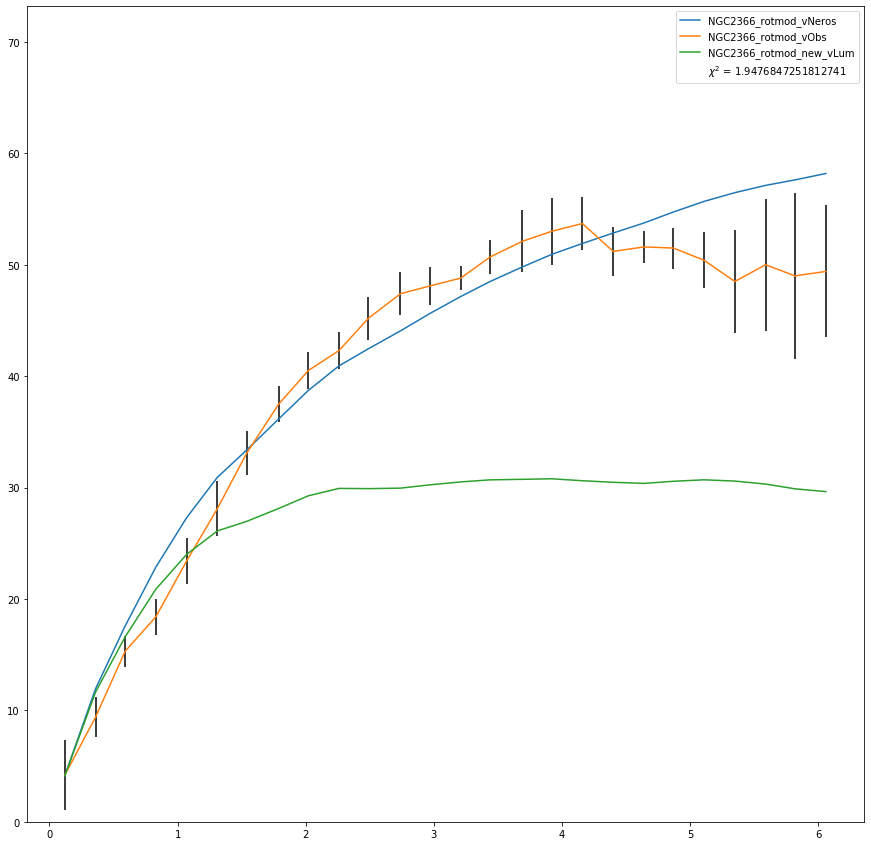

In [5]:
"""
This is the main body of the model. 
It loops through galaxies in the designated sample,
it calculates vLCM, vNeros, and chiSquared,
it fits galaxy data using alpha and vLumFreeParam,
it prints the values of alpha and vLumFreeParam to the console,
and it saves the graphs to a file.
"""

# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data_" + str(galaxies_name) + "_" + str(MW_name) + "_" + str(v1v2) + ".csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2},{3},{4},{5}\n'.format("Galaxy", "chi_square",  "alpha", "disk_scale", "bulge_scale","phi_zero"))
f.close()

total_chi_squared = []


for galaxyName in galaxies:
    f, ax = plt.subplots(1, figsize = (15, 15))
    
    # Extract out the needed galaxy components
    galaxy = np.array(galaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]

    # Just fit then extract the relevant pieces
    neros_fns.fit(galaxy_rad, galaxy_gas, galaxy_disk, galaxy_bulge, galaxy_vObs, galaxy_error)

    print(f"galaxyName is: {galaxyName}")
    fit_results = neros_fns.get_fit_results(galaxy_rad)
    for param in fit_results:
        print(f"{param} is: {fit_results[param]}")
    print("--------------------------")
    
    total_chi_squared.append(fit_results['chi_squared'])
    
    print("Running average chi_squared: {}".format(sum(total_chi_squared)/len(total_chi_squared)))

    
    # Write galaxyName, fitted parameters
    with open(out_file, 'a') as f:
        f.write(f"{galaxyName},{fit_results['chi_squared']},{fit_results['alpha']}, \
                {fit_results['disk_scale']},{fit_results['bulge_scale']},{fit_results['phi_zero']} \n")
    f.close()

    trimmed_rad = neros_fns.get_rad()
    trimmed_vLum_updated = neros_fns.get_vLum_scaled()
    trimmed_vObs = neros_fns.get_vObs()
    trimmed_error = neros_fns.get_vObsError()
    vNeros = neros_fns.get_vNeros()
    
    # plot
    # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
    # or to the maximum value in the list vNeros, whichever is the bigger number
    y_max = max(max(trimmed_vObs + trimmed_error), max(vNeros))
    ax.set_ylim(bottom = 0, top = y_max + 15)

    # plot vObs and vNeros and updated vLum
    ax.plot(trimmed_rad, vNeros, label="{}_vNeros".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vObs, label="{}_vObs".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vLum_updated, label="{}_new_vLum".format(galaxyName))
    ax.plot([],[], ' ', label="$\chi^2$ = {}".format(fit_results['chi_squared']))

    # error bar in vObs
    for i in range(len(trimmed_rad)):
        ax.vlines(trimmed_rad[i], trimmed_vObs[i] - trimmed_error[i], trimmed_vObs[i] + trimmed_error[i])

    ax.legend(loc="upper right")

    graph_file_name = "graphs/" + str(galaxyName) + "_" + str(galaxies_name)+ "_" + str(MW_name)+ "_" + str(v1v2)

    plt.savefig(graph_file_name)
